In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings("ignore")
import json
from tabulate import tabulate
import random

from sklearn.preprocessing import LabelEncoder,StandardScaler,normalize,MinMaxScaler

from imblearn.over_sampling import SMOTE
from sklearn.model_selection import train_test_split,KFold,GridSearchCV,cross_val_score
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis as LDA

from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix,accuracy_score,classification_report,precision_score,recall_score,f1_score

from sklearn.naive_bayes import GaussianNB

from sklearn import tree
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier,AdaBoostClassifier,StackingClassifier

from sklearn.neighbors import KNeighborsClassifier

from sklearn.svm import SVC

from imblearn.over_sampling import SMOTE

from sklearn.metrics import roc_auc_score,roc_curve


In [2]:
# Reading first data
movie_df=pd.read_csv("DS_C14_Capstone_tmdb_5000_movies.csv")
movie_df.head(2)

budget                                             genres  \
0  237000000  [{"id": 28, "name": "Action"}, {"id": 12, "nam...   
1  300000000  [{"id": 12, "name": "Adventure"}, {"id": 14, "...   

                                       homepage     id  \
0                   http://www.avatarmovie.com/  19995   
1  http://disney.go.com/disneypictures/pirates/    285   

                                            keywords original_language  \
0  [{"id": 1463, "name": "culture clash"}, {"id":...                en   
1  [{"id": 270, "name": "ocean"}, {"id": 726, "na...                en   

                                            overview  popularity  \
0  In the 22nd century, a paraplegic Marine is di...  150.437577   
1  Captain Barbossa, long believed to be dead, ha...  139.082615   

                                production_companies  \
0  [{"name": "Ingenious Film Partners", "id": 289...   
1  [{"name": "Walt Disney Pictures", "id": 2}, {"...   

                                production_countries release_date     revenue  \
0  [{"iso_3166_1": "US", "name": "United States o...   10-12-2009  2787965087   
1  [{"iso_3166_1": "US", "name": "United States o...   19-05-2007   961000000   

   runtime    status                                         tagline  \
0    162.0  Released                     Enter the World of Pandora.   
1    169.0  Released  At the end of the world, the adventure begins.   

                                      title  vote_average  vote_count  
0                                    Avatar           7.2       11800  
1  Pirates of the Caribbean: At World's End           6.9        4500

In [3]:
# Reading second Data
credit_df=pd.read_csv("DS_C14_Capstone_tmdb_5000_credits.csv")
credit_df

movie_id                                     title  \
0        19995                                    Avatar   
1          285  Pirates of the Caribbean: At World's End   
2       206647                                   Spectre   
3        49026                     The Dark Knight Rises   
4        49529                               John Carter   
...        ...                                       ...   
4798      9367                               El Mariachi   
4799     72766                                 Newlyweds   
4800    231617                 Signed, Sealed, Delivered   
4801    126186                          Shanghai Calling   
4802     25975                         My Date with Drew   

                                                   cast  \
0     [{"cast_id": 242, "character": "Jake Sully", "...   
1     [{"cast_id": 4, "character": "Captain Jack Spa...   
2     [{"cast_id": 1, "character": "James Bond", "cr...   
3     [{"cast_id": 2, "character": "Bruce Wayne / Ba...   
4     [{"cast_id": 5, "character": "John Carter", "c...   
...                                                 ...   
4798  [{"cast_id": 1, "character": "El Mariachi", "c...   
4799  [{"cast_id": 1, "character": "Buzzy", "credit_...   
4800  [{"cast_id": 8, "character": "Oliver O\u2019To...   
4801  [{"cast_id": 3, "character": "Sam", "credit_id...   
4802  [{"cast_id": 3, "character": "Herself", "credi...   

                                                   crew  
0     [{"credit_id": "52fe48009251416c750aca23", "de...  
1     [{"credit_id": "52fe4232c3a36847f800b579", "de...  
2     [{"credit_id": "54805967c3a36829b5002c41", "de...  
3     [{"credit_id": "52fe4781c3a36847f81398c3", "de...  
4     [{"credit_id": "52fe479ac3a36847f813eaa3", "de...  
...                                                 ...  
4798  [{"credit_id": "52fe44eec3a36847f80b280b", "de...  
4799  [{"credit_id": "52fe487dc3a368484e0fb013", "de...  
4800  [{"credit_id": "52fe4df3c3a36847f8275ecf", "de...  
4801  [{"credit_id": "52fe4ad9c3a368484e16a36b", "de...  
4802  [{"credit_id": "58ce021b9251415a390165d9", "de...  

[4803 rows x 4 columns]

In [4]:
# dropping title feature
movie_df.drop("title",axis=1,inplace=True)

In [5]:
# Merging Two Dataframe
movie_data=movie_df.merge(credit_df,left_on='id', right_on='movie_id')
movie_data.drop("movie_id",axis=1,inplace=True)
movie_data.head(2)

budget                                             genres  \
0  237000000  [{"id": 28, "name": "Action"}, {"id": 12, "nam...   
1  300000000  [{"id": 12, "name": "Adventure"}, {"id": 14, "...   

                                       homepage     id  \
0                   http://www.avatarmovie.com/  19995   
1  http://disney.go.com/disneypictures/pirates/    285   

                                            keywords original_language  \
0  [{"id": 1463, "name": "culture clash"}, {"id":...                en   
1  [{"id": 270, "name": "ocean"}, {"id": 726, "na...                en   

                                            overview  popularity  \
0  In the 22nd century, a paraplegic Marine is di...  150.437577   
1  Captain Barbossa, long believed to be dead, ha...  139.082615   

                                production_companies  \
0  [{"name": "Ingenious Film Partners", "id": 289...   
1  [{"name": "Walt Disney Pictures", "id": 2}, {"...   

                                production_countries release_date     revenue  \
0  [{"iso_3166_1": "US", "name": "United States o...   10-12-2009  2787965087   
1  [{"iso_3166_1": "US", "name": "United States o...   19-05-2007   961000000   

   runtime    status                                         tagline  \
0    162.0  Released                     Enter the World of Pandora.   
1    169.0  Released  At the end of the world, the adventure begins.   

   vote_average  vote_count                                     title  \
0           7.2       11800                                    Avatar   
1           6.9        4500  Pirates of the Caribbean: At World's End   

                                                cast  \
0  [{"cast_id": 242, "character": "Jake Sully", "...   
1  [{"cast_id": 4, "character": "Captain Jack Spa...   

                                                crew  
0  [{"credit_id": "52fe48009251416c750aca23", "de...  
1  [{"credit_id": "52fe4232c3a36847f800b579", "de...

In [6]:
# Shape of the data
movie_data.shape

(4803, 20)

In [7]:
# Data Information
movie_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 4803 entries, 0 to 4802
Data columns (total 20 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   budget                4803 non-null   int64  
 1   genres                4803 non-null   object 
 2   homepage              1712 non-null   object 
 3   id                    4803 non-null   int64  
 4   keywords              4803 non-null   object 
 5   original_language     4803 non-null   object 
 6   overview              4800 non-null   object 
 7   popularity            4803 non-null   float64
 8   production_companies  4803 non-null   object 
 9   production_countries  4803 non-null   object 
 10  release_date          4802 non-null   object 
 11  revenue               4803 non-null   int64  
 12  runtime               4801 non-null   float64
 13  status                4803 non-null   object 
 14  tagline               3959 non-null   object 
 15  vote_average         

In [8]:
# Null values and percentage of null values in feature.
nulls=pd.DataFrame([movie_data.isnull().sum(),(movie_data.isnull().sum()/movie_data.shape[0])*100]).transpose()
nulls.rename(columns={0:"number of nulls",1:"percentage of nulls"},inplace=True)
nulls

number of nulls  percentage of nulls
budget                            0.0             0.000000
genres                            0.0             0.000000
homepage                       3091.0            64.355611
id                                0.0             0.000000
keywords                          0.0             0.000000
original_language                 0.0             0.000000
overview                          3.0             0.062461
popularity                        0.0             0.000000
production_companies              0.0             0.000000
production_countries              0.0             0.000000
release_date                      1.0             0.020820
revenue                           0.0             0.000000
runtime                           2.0             0.041641
status                            0.0             0.000000
tagline                         844.0            17.572351
vote_average                      0.0             0.000000
vote_count                        0.0             0.000000
title                             0.0             0.000000
cast                              0.0             0.000000
crew                              0.0             0.000000

In [9]:
# unique values in each feature.
movie_data.nunique()

budget                   436
genres                  1175
homepage                1691
id                      4803
keywords                4222
original_language         37
overview                4800
popularity              4802
production_companies    3697
production_countries     469
release_date            3280
revenue                 3297
runtime                  156
status                     3
tagline                 3944
vote_average              71
vote_count              1609
title                   4800
cast                    4761
crew                    4776
dtype: int64

In [10]:
# Null value imputation.
movie_data.drop("homepage",axis=1,inplace=True)
movie_data["tagline"].fillna("Unknown_tagline",inplace=True)
movie_data["overview"].fillna("Unknown_overview",inplace=True)
movie_data["runtime"].fillna(round(movie_data["runtime"].mean()),inplace=True)

In [11]:
# converting release date feature datatype object to datetime and two new features created year and month.
movie_data['release_year'] = pd.DatetimeIndex(movie_data['release_date']).year
movie_data['release_month'] = pd.DatetimeIndex(movie_data['release_date']).month

In [12]:
# checking for duplicated records.
movie_data.duplicated().sum()

0

In [13]:
# Description of the data
movie_data.describe()

budget             id   popularity       revenue      runtime  \
count  4.803000e+03    4803.000000  4803.000000  4.803000e+03  4803.000000   
mean   2.904504e+07   57165.484281    21.492301  8.226064e+07   106.875911   
std    4.072239e+07   88694.614033    31.816650  1.628571e+08    22.607225   
min    0.000000e+00       5.000000     0.000000  0.000000e+00     0.000000   
25%    7.900000e+05    9014.500000     4.668070  0.000000e+00    94.000000   
50%    1.500000e+07   14629.000000    12.921594  1.917000e+07   103.000000   
75%    4.000000e+07   58610.500000    28.313505  9.291719e+07   117.500000   
max    3.800000e+08  459488.000000   875.581305  2.787965e+09   338.000000   

       vote_average    vote_count  release_year  release_month  
count   4803.000000   4803.000000   4802.000000    4802.000000  
mean       6.092172    690.217989   2002.468763       6.642232  
std        1.194612   1234.585891     12.414354       3.534499  
min        0.000000      0.000000   1916.000000       1.000000  
25%        5.600000     54.000000   1999.000000       4.000000  
50%        6.200000    235.000000   2005.000000       7.000000  
75%        6.800000    737.000000   2011.000000      10.000000  
max       10.000000  13752.000000   2017.000000      12.000000

In [14]:
# created a function to convert json to str(string) format
def json_to_string(row):
    json_data = json.loads(row)
    values=[data.get("name") for data in json_data]   
    return values[:]

In [15]:
# Extracted the Genre Type from genres
d_genre = movie_data["genres"].apply(json_to_string)

movie_data["genre_type"] = d_genre.apply(lambda x:x[0] if len(x)>=1 else None)

In [16]:
# Extracted the production_countrty from production countries
d_prdtn_cmpny = movie_data['production_countries'].apply(json_to_string)
movie_data['production_country'] = d_prdtn_cmpny.apply(lambda x:x[0] if len(x)>=1 else None)

In [17]:
# Extracted the lead name for cast
ld_nme = movie_data['cast'].apply(json_to_string)
movie_data['lead_name'] =ld_nme.apply(lambda x:x[0] if len(x)>=1 else None)

In [18]:
# Extracted the production company from production companies
prd_cmpny = movie_data['production_companies'].apply(json_to_string)
movie_data['production_company']  = prd_cmpny.apply(lambda x:x[0] if len(x)>=1 else None)

In [19]:
#created a function to extract the lead_character_name from cast
def js(row):
    json_data = json.loads(row)
    values=[data.get("character") for data in json_data]
    return values[:3] 

In [20]:
# extract the lead_character_name from cast
lead_chatacter_name = movie_data['cast'].apply(js)
movie_data['lead_chatacter_name'] = lead_chatacter_name.apply(lambda x:x[0] if len(x)>=1 else None)

In [21]:
# extracted the Directors name.
movie_data['crew'] = movie_data['crew'].apply(json.loads)
extract_director_names = lambda x: [person['name'] for person in x if person['job'] == 'Director']
director_names = movie_data['crew'].apply(extract_director_names)
movie_data['directors'] = director_names.apply(lambda x:x[0] if len(x)>=1 else None)

In [22]:
# Dropping unnessesary columns.
movie_data.drop(['id','genres','keywords','production_companies', 'production_countries','cast', 'crew', 'release_date', 'overview','tagline'], axis=1, inplace=True)

In [23]:
# number of movies with runtime 0
len(movie_data[movie_data["runtime"]==0])

35

In [24]:
# number of movies with revenue 0
len(movie_data[ (movie_data["revenue"]==0)])

1427

In [25]:
# number of movies with Budget 0
len(movie_data[ (movie_data["budget"]==0)])

1037

In [26]:
# eliminating records with 0 runtime
movie_data=movie_data[movie_data["runtime"]!=0]

In [27]:
# Imputing of revenue and budget which have 0 values by random quantile 30 to 70.
np.random.seed(35)
list1=np.random.randint(30,70,size=len(movie_data))
j=0
for i in list(movie_data[ (movie_data["budget"]==0)].index):
    movie_data["budget"][i]=movie_data["budget"].quantile(list1[j]/100)
    j+=1
k=0
for i in list(movie_data[ (movie_data["revenue"]==0)].index):
    movie_data["revenue"][i]=movie_data["revenue"].quantile(list1[k]/100)
    k+=1

In [28]:
# new feature profit created by substracting Budget from revenue
movie_data['profit'] = movie_data['revenue'] - movie_data['budget']

In [29]:
# Information of new data
movie_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 4768 entries, 0 to 4802
Data columns (total 18 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   budget               4768 non-null   float64
 1   original_language    4768 non-null   object 
 2   popularity           4768 non-null   float64
 3   revenue              4768 non-null   float64
 4   runtime              4768 non-null   float64
 5   status               4768 non-null   object 
 6   vote_average         4768 non-null   float64
 7   vote_count           4768 non-null   int64  
 8   title                4768 non-null   object 
 9   release_year         4768 non-null   float64
 10  release_month        4768 non-null   float64
 11  genre_type           4753 non-null   object 
 12  production_country   4620 non-null   object 
 13  lead_name            4738 non-null   object 
 14  production_company   4446 non-null   object 
 15  lead_chatacter_name  4738 non-null   o

In [30]:
# Null values and percentage of null values in feature.
nulls=pd.DataFrame([movie_data.isnull().sum(),(movie_data.isnull().sum()/movie_data.shape[0])*100]).transpose()
nulls.rename(columns={0:"number of nulls",1:"percentage of nulls"},inplace=True)
nulls

number of nulls  percentage of nulls
budget                           0.0             0.000000
original_language                0.0             0.000000
popularity                       0.0             0.000000
revenue                          0.0             0.000000
runtime                          0.0             0.000000
status                           0.0             0.000000
vote_average                     0.0             0.000000
vote_count                       0.0             0.000000
title                            0.0             0.000000
release_year                     0.0             0.000000
release_month                    0.0             0.000000
genre_type                      15.0             0.314597
production_country             148.0             3.104027
lead_name                       30.0             0.629195
production_company             322.0             6.753356
lead_chatacter_name             30.0             0.629195
directors                       18.0             0.377517
profit                           0.0             0.000000

In [31]:
# Imputing Null values in genre type feature
movie_data["genre_type"].fillna(movie_data["genre_type"].mode()[0],inplace=True)

In [32]:
# Dropping all null values from the data
movie_data.dropna(inplace=True)

In [33]:
# unique values in each feature.
movie_data.nunique()

budget                  463
original_language        34
popularity             4418
revenue                4311
runtime                 151
status                    2
vote_average             67
vote_count             1609
title                  4417
release_year             89
release_month            12
genre_type               20
production_country       65
lead_name              1866
production_company     1292
lead_chatacter_name    3883
directors              2087
profit                 4371
dtype: int64

In [34]:
#created a function to seperate the object features from Numerical features
def dtype(df):
    cat = []
    con = []
    for col in df:
        if((df[col].nunique() <15) |(df[col].dtype == 'object')):
            cat.append(col)
        else:
            con.append(col)
    return cat, con
cat, con = dtype(movie_data)
print(tabulate({'Categorical':cat,'Numerical':con},headers=['Categorical','Numerical']))

Categorical          Numerical
-------------------  ------------
original_language    budget
status               popularity
title                revenue
release_month        runtime
genre_type           vote_average
production_country   vote_count
lead_name            release_year
production_company   profit
lead_chatacter_name
directors


## --------------------------------------------------------EDA ----------------------------------------------------------------------

## Univariate for Categorical columns

In [35]:
def bar_pie(*s):
    for col in s:
        value_counts=movie_data[col].value_counts()
        
        if col=="production_country":
            fig,ax=plt.subplots(1,2,figsize=(12,8))
            sns.barplot(y=value_counts.index,x=value_counts.values,ax=ax[0],orient="h")
        else:
            fig,ax=plt.subplots(1,2,figsize=(12,4))
            sns.barplot(y=value_counts.index,x=value_counts.values,ax=ax[0],orient="h")
        ax[0].set_title(f"count of {col} in each type")
        ax[0].set_xlabel(f"{col}")
        ax[0].set_ylabel(f"frequency of {col}")

        per=movie_data[col].value_counts(normalize=True)*100
        ax[1].pie(per.values,labels=per.index,autopct="%1.1f%%")
        ax[1].set_title(f"percentage of {col}")

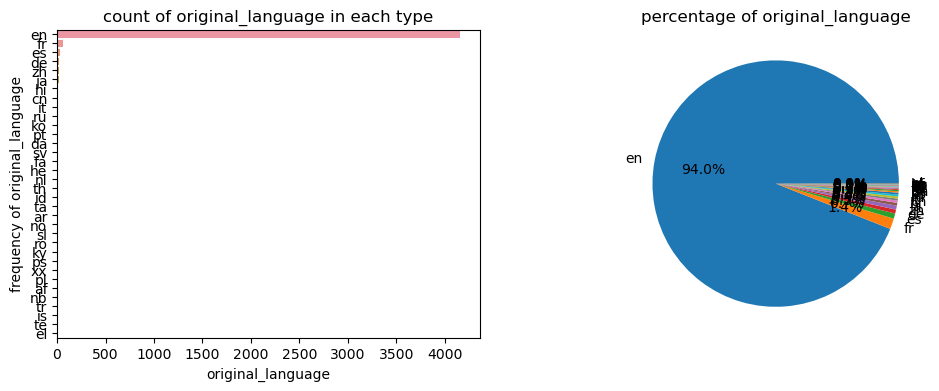

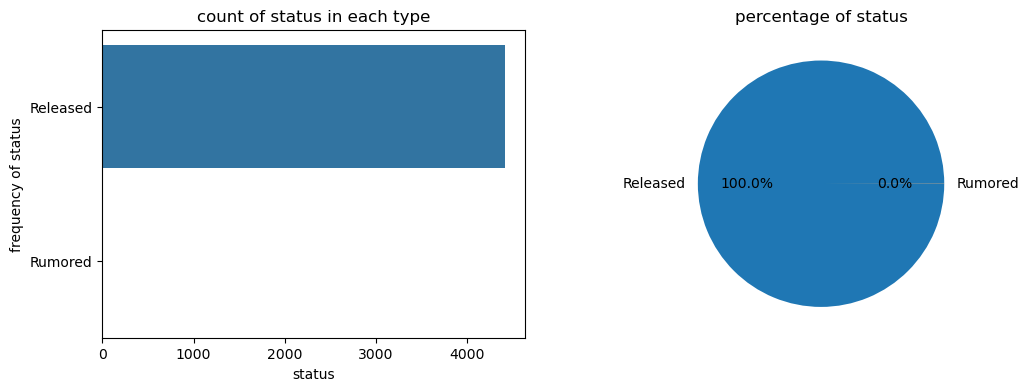

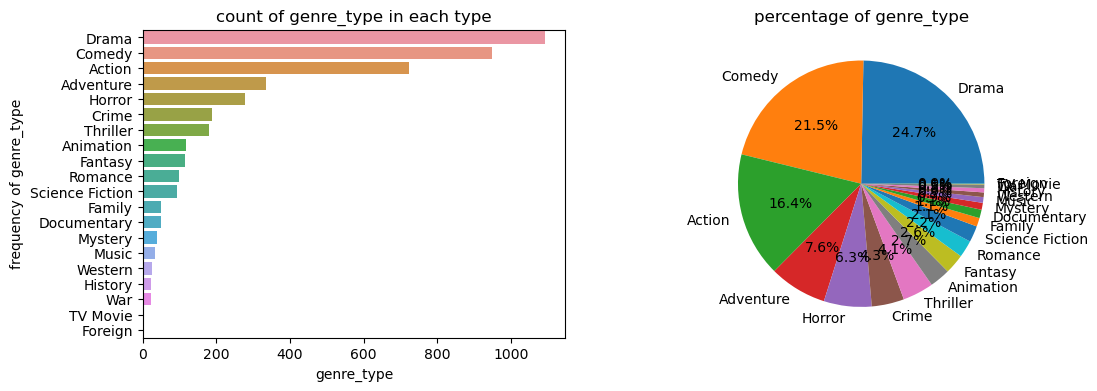

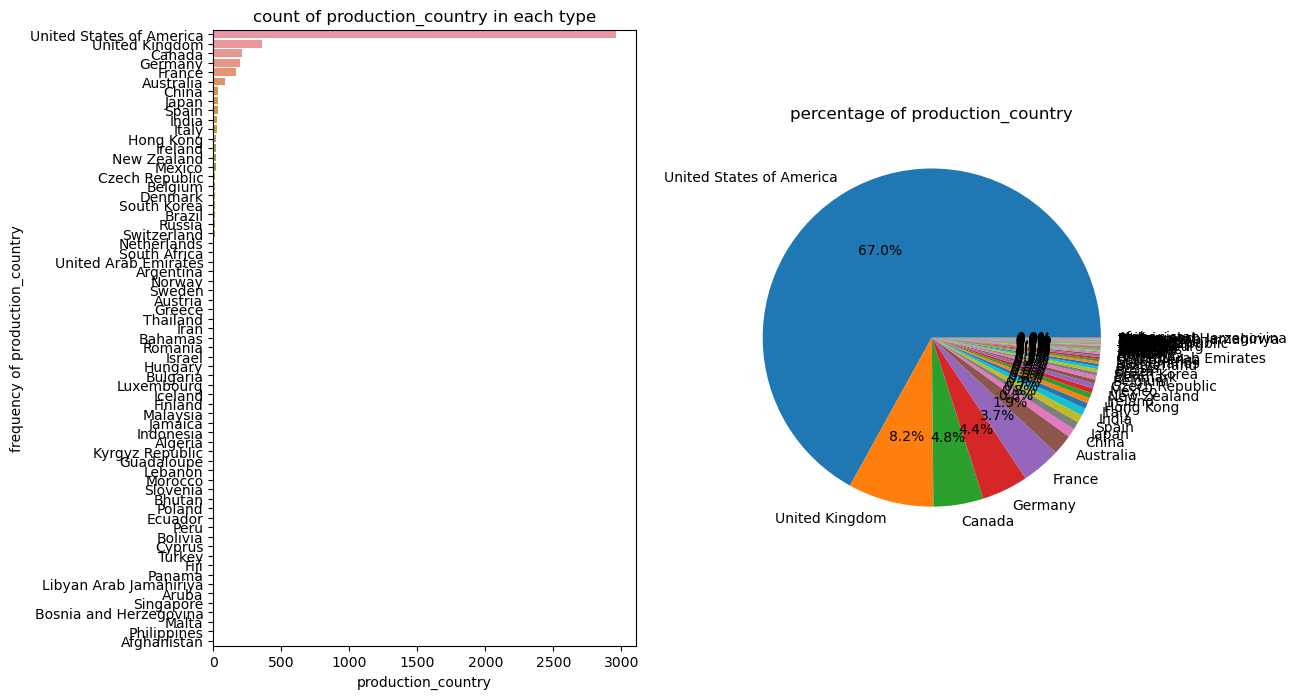

In [36]:
 bar_pie('original_language',
 'status',
 'genre_type',
 'production_country',)

## Univariate for Numerical columns

In [37]:
def hist_box(*s):
    for col in s:
        values=movie_data[col].values
        fig,ax=plt.subplots(1,2,figsize=(15,4))
        sns.histplot(values,bins=20,ax=ax[0])
        ax[0].set_title(f"Distribution of {col} using histogram")
        ax[0].set_xlabel(f"{col}")
        ax[0].set_ylabel(f"frequency of {col}")


        sns.boxplot(y=movie_data[col],ax=ax[1])
        ax[1].set_title(f"Distribution using boxplot of {col}")

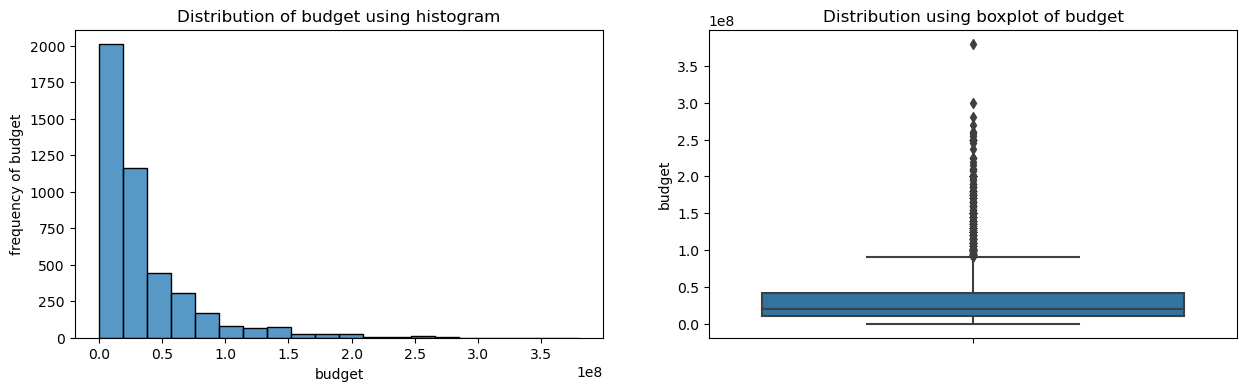

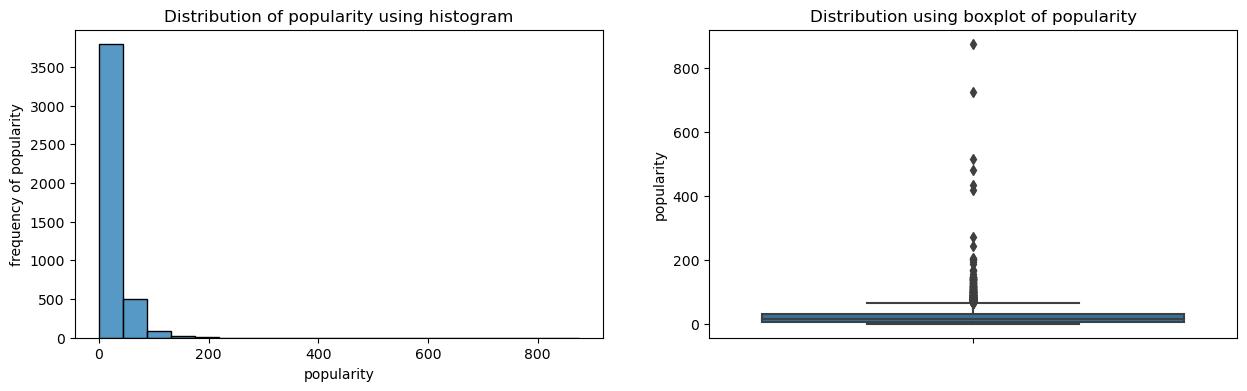

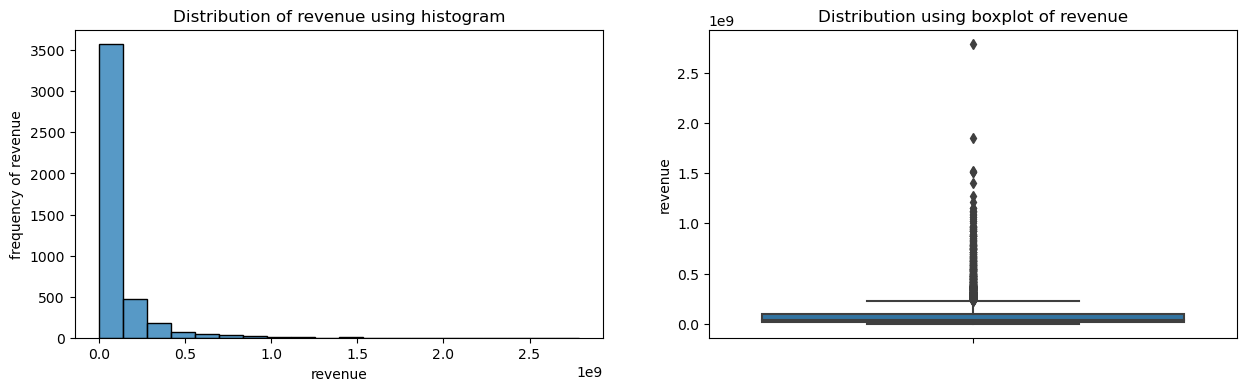

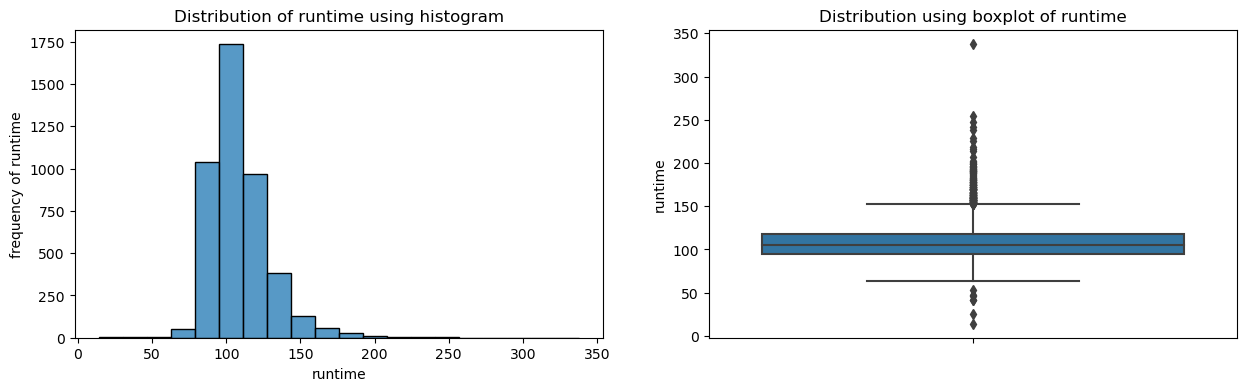

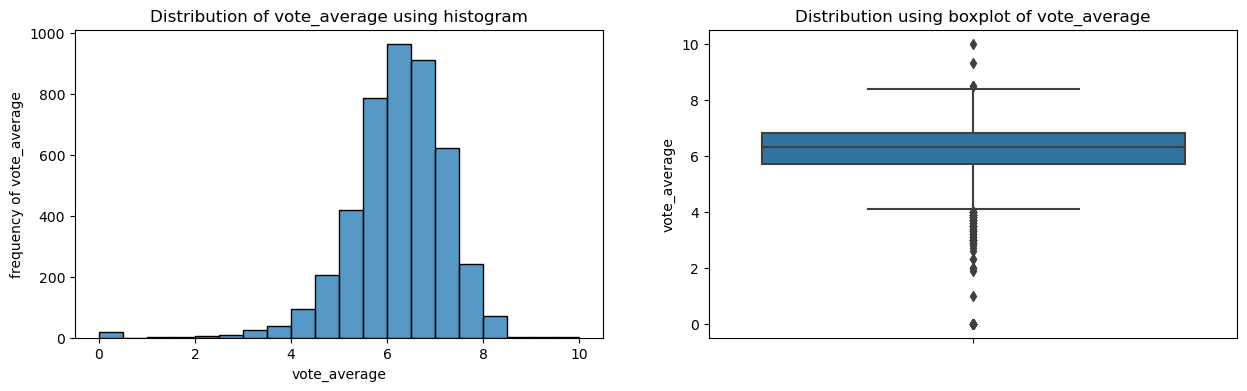

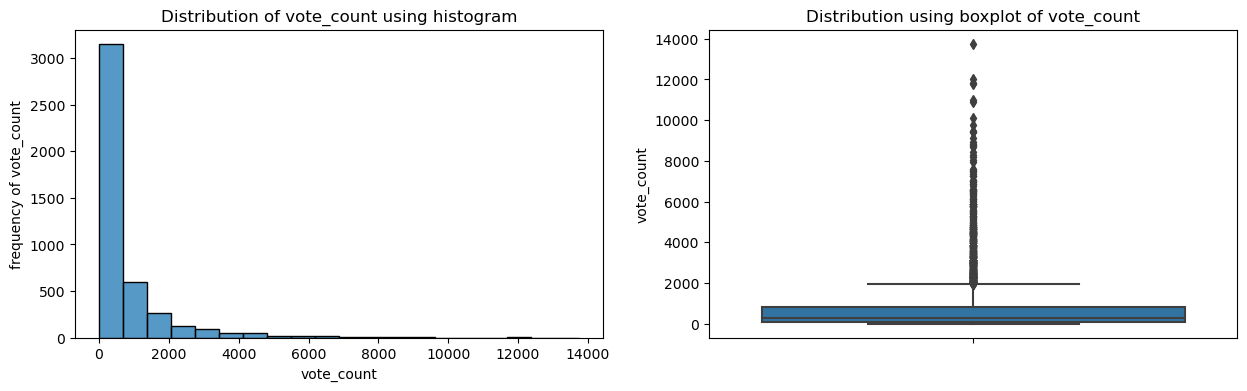

In [38]:
hist_box("budget","popularity","revenue","runtime","vote_average","vote_count")

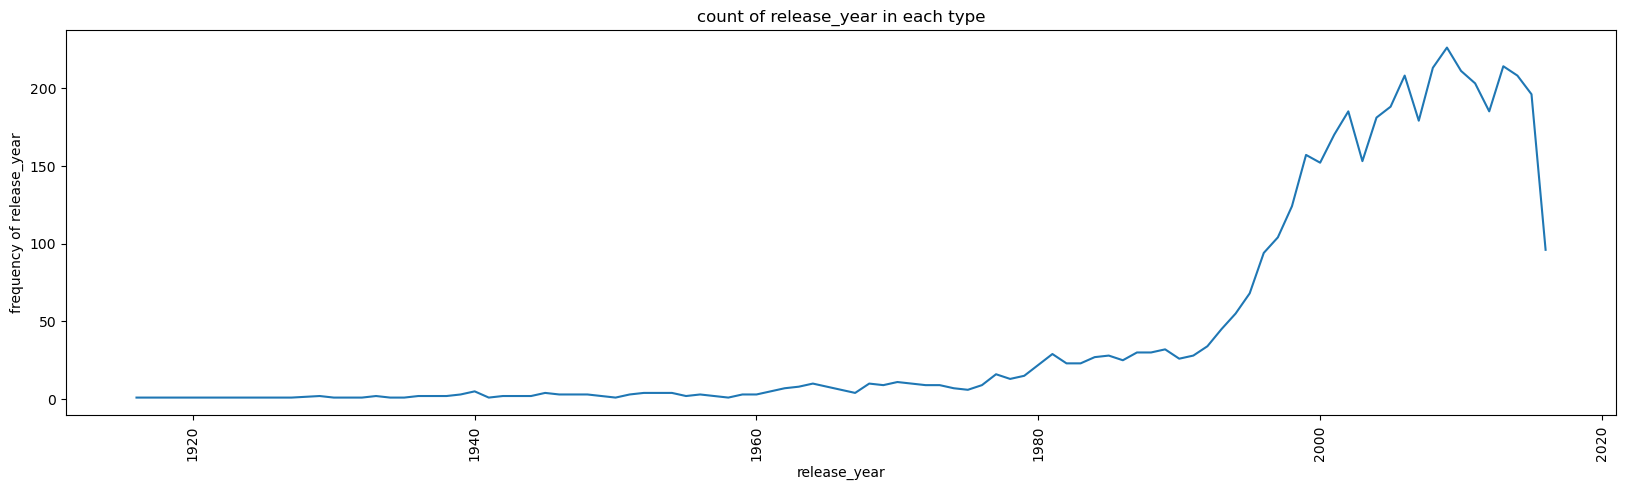

In [39]:
value_counts=movie_data["release_year"].value_counts()
plt.figure(figsize=(20,5))
sns.lineplot(value_counts.index,value_counts.values)
plt.title("count of release_year in each type")
plt.xlabel("release_year")
plt.ylabel("frequency of release_year")
plt.xticks(rotation=90)
plt.show()

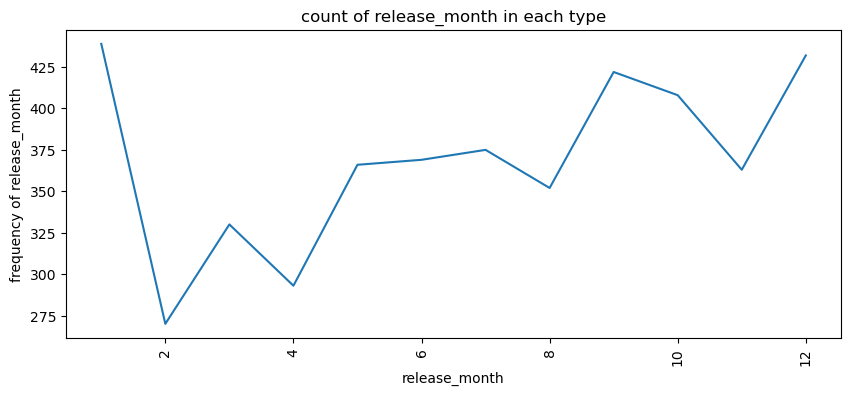

In [40]:
value_counts=movie_data["release_month"].value_counts()
plt.figure(figsize=(10,4))
sns.lineplot(value_counts.index,value_counts.values)
plt.title("count of release_month in each type")
plt.xlabel("release_month")
plt.ylabel("frequency of release_month")
plt.xticks(rotation=90)
plt.show()

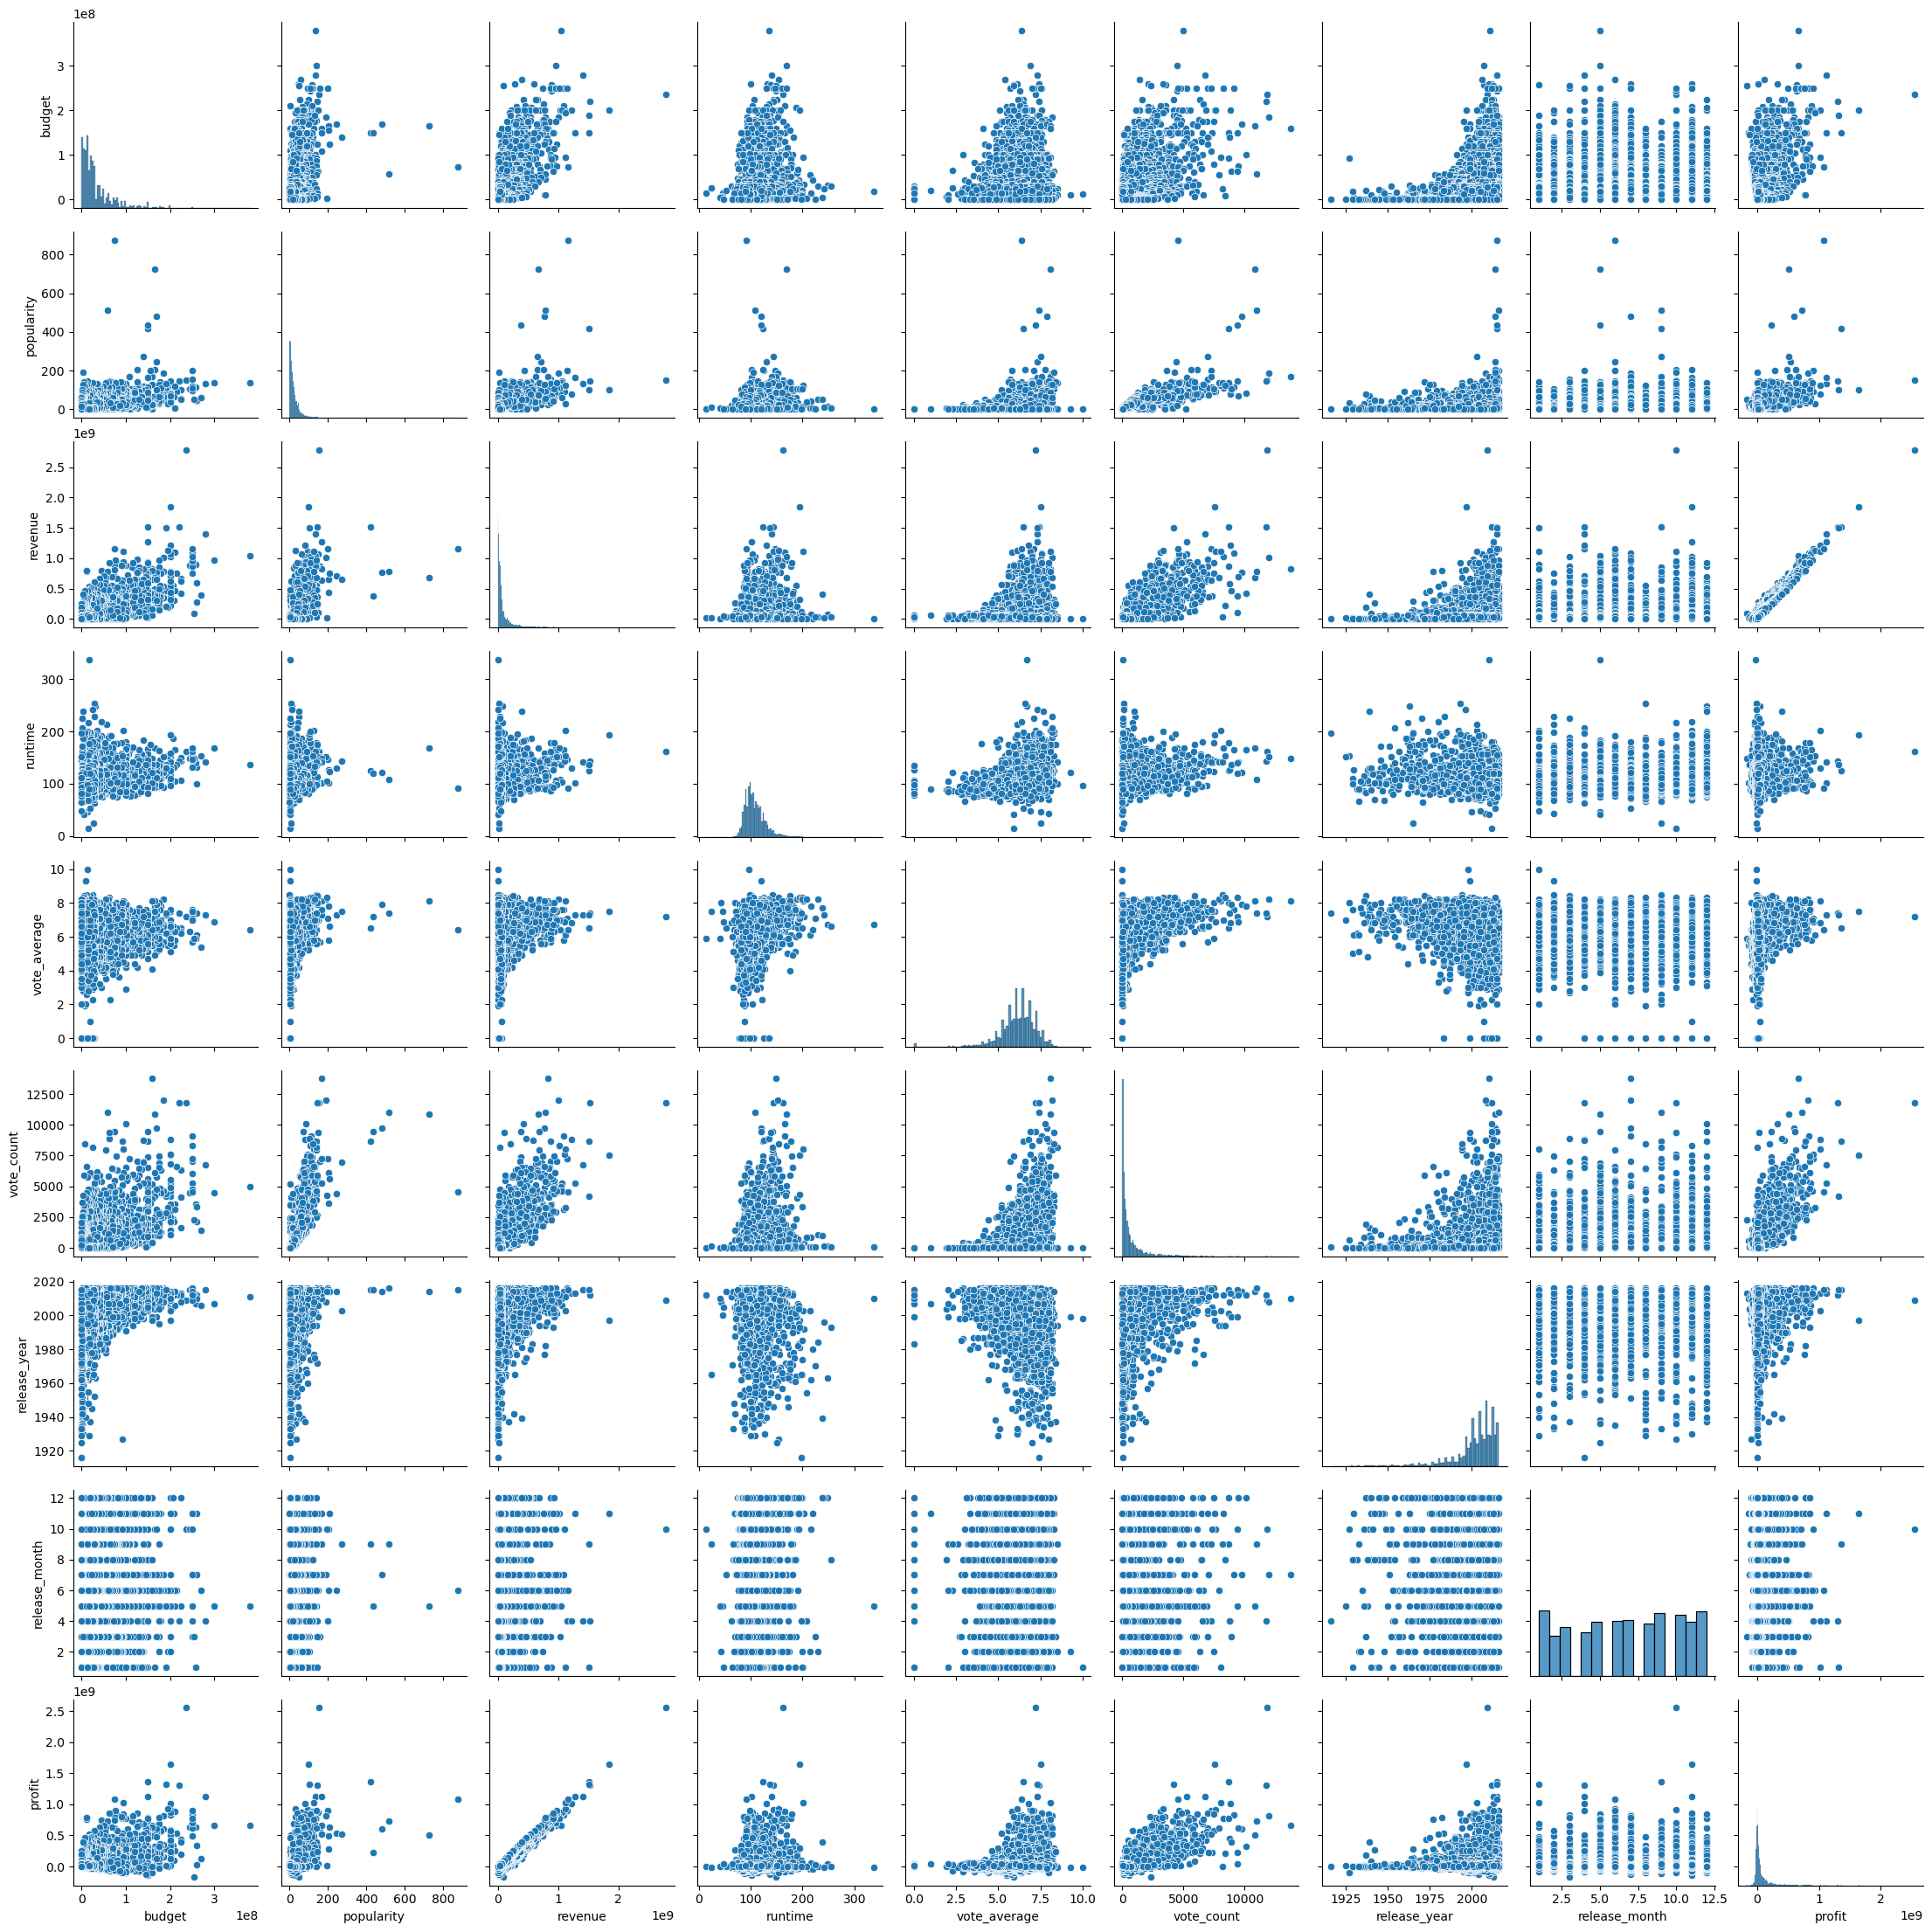

In [41]:
sns.pairplot(movie_data)
plt.show()

## Bivariate

In [42]:
def bi_rat(*s):
        fig,ax=plt.subplots(2,1,figsize=(15,10))
        ax=ax.ravel()
       
        for col in s:
            sns.lineplot(x="release_year",y=col,data=movie_data,ax=ax[0])
            ax[0].set_title(f"release_year wise {col}")
            sns.lineplot(x="release_month",y=col,data=movie_data,ax=ax[1])
            ax[1].set_title(f"release_month wise {col}")
        plt.show()

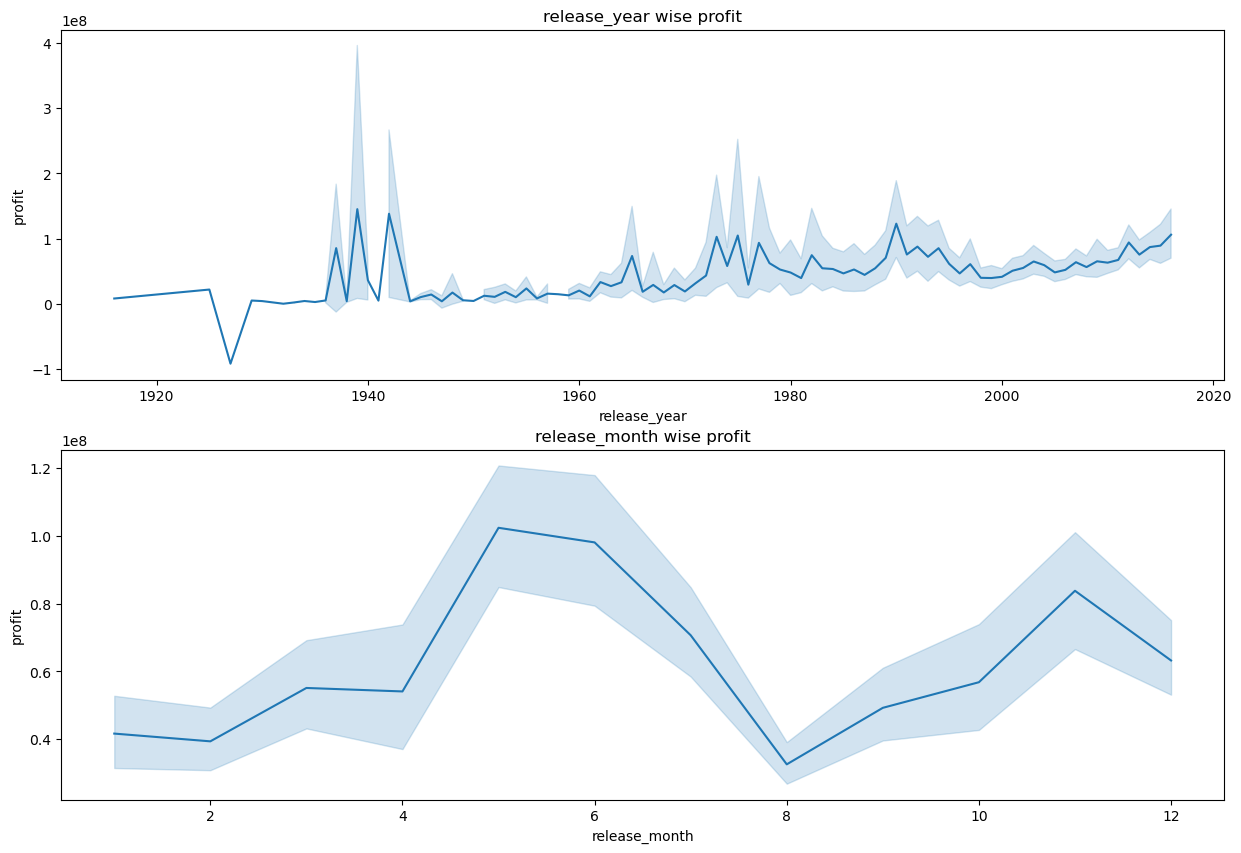

In [43]:
bi_rat("profit")

In [44]:
def cat_profits(col):
    sorted_df=movie_data.sort_values("profit",ascending=False).head(10)
    plt.figure(figsize=(5,3))
    sns.barplot(y= sorted_df[col], x=sorted_df['profit'], data= movie_data,orient="h")
    plt.ylabel(col)
    plt.xlabel('profit')
    plt.title(f'{col} vs profit')
    plt.show()

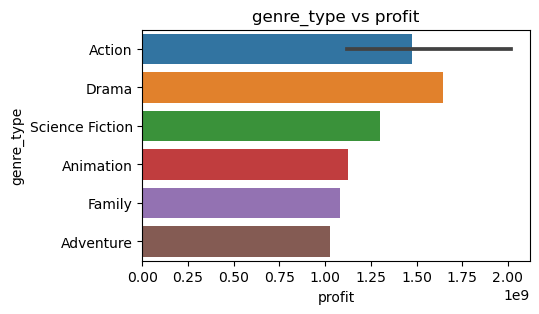

In [45]:
cat_profits("genre_type")

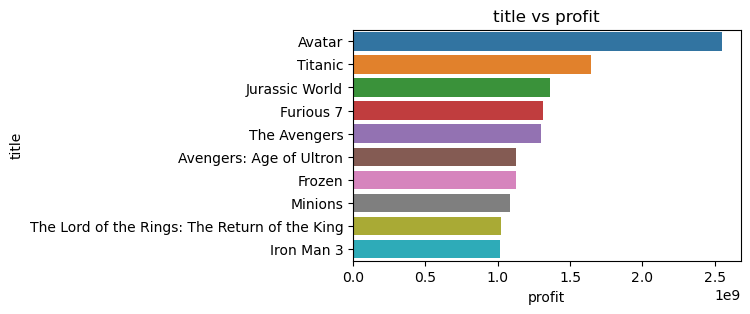

In [46]:
cat_profits("title")

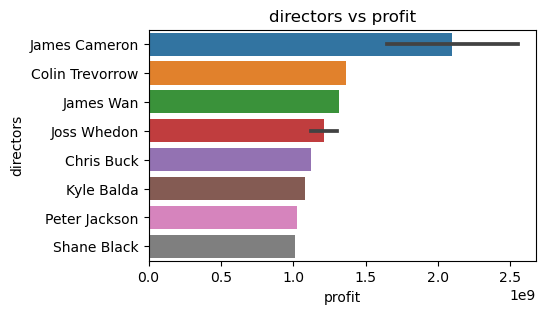

In [47]:
cat_profits("directors")

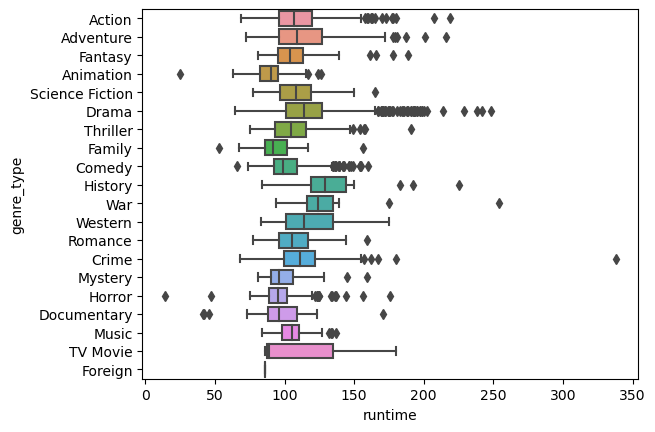

In [48]:
sns.boxplot(x="runtime",y="genre_type",data=movie_data)
plt.show()

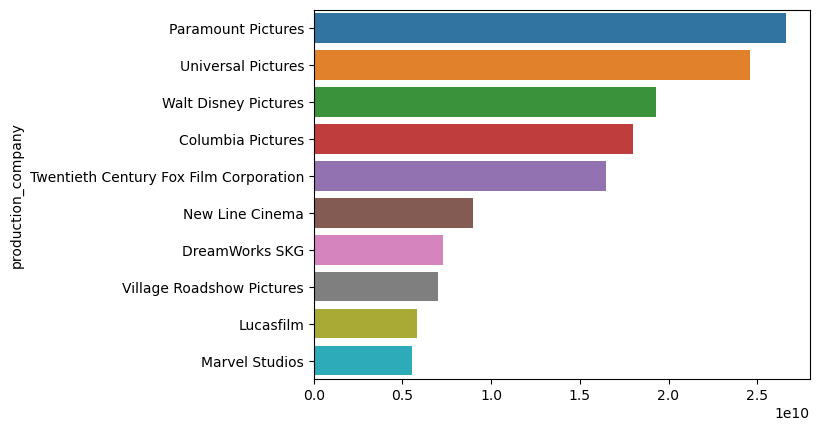

In [49]:
top_10 = movie_data.groupby(movie_data['production_company'])['profit'].sum()
top_10=top_10.sort_values(ascending=False).head(10)
sns.barplot(y=top_10.index,x=top_10.values)
plt.show()

## Multivariate

### 1. Show top 10 action movies which are released after 2012 based on revenue

In [50]:
task1=movie_data[(movie_data["status"]=="Released") & (movie_data["release_year"]>2011)]
task1=task1.sort_values("revenue",ascending=False).head(10)

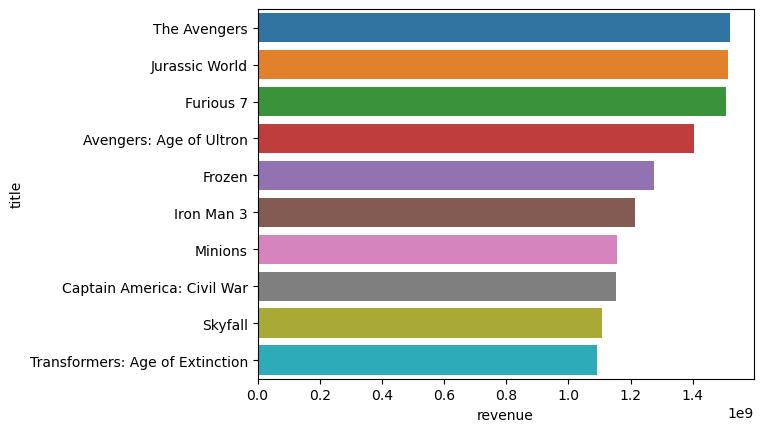

In [51]:
sns.barplot(y=task1["title"],x=task1["revenue"])
plt.show()

### 2. Show top 10 popular drama type english movies with minimum runtime 150 mins.

In [52]:
task2=movie_data[(movie_data["genre_type"]=="Drama") & (movie_data["original_language"]=="en") & (movie_data["runtime"]>=150)]
task2=task2.sort_values("popularity",ascending=False).head(10)

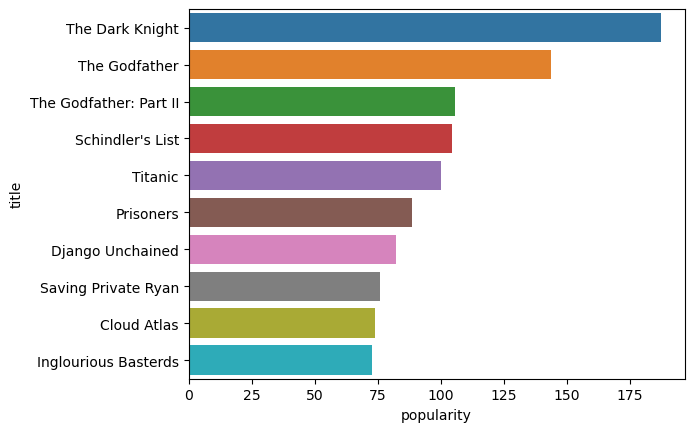

In [53]:
sns.barplot(y=task2["title"],x=task2["popularity"])
plt.show()

### 3.Top 10 directors based on total profit who released movie in between 2000 to 2010 and popularity over 100.

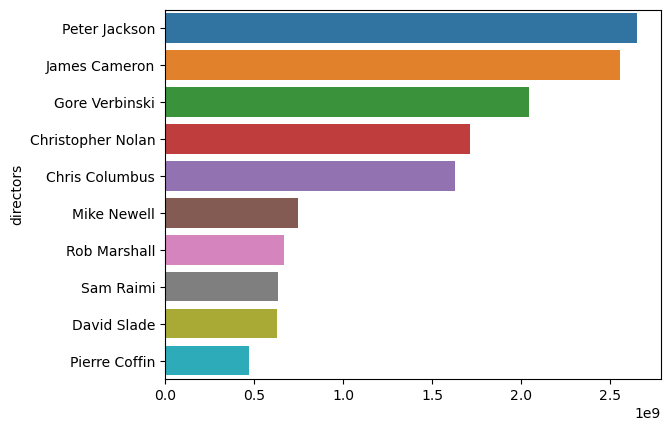

In [54]:

task3=movie_data[(movie_data["popularity"]>=100) & (movie_data["release_year"].between(2000,2011))]
task3 = task3.groupby(task3['directors'])['profit'].sum()
task3=task3.sort_values(ascending=False).head(10)
sns.barplot(y=task3.index,x=task3.values)
plt.show()

### 4. Top 10 popular movie's lead actor's name who worked with Walt Disney Pictures movie production company and did comedy movie.

In [55]:
task4=movie_data[(movie_data["production_company"]=="Walt Disney Pictures") & (movie_data["genre_type"]=="Comedy")]
task4=task4.sort_values("popularity",ascending=False).head(10)

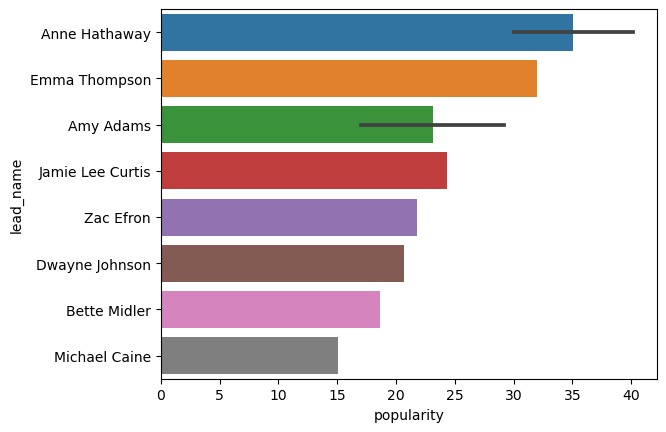

In [56]:
sns.barplot(y=task4["lead_name"],x=task4["popularity"])
plt.show()

### 5. Top 10 directors with highest budget that movie released after 2010 and avg vote got more than 5 and released in the month of may or june.

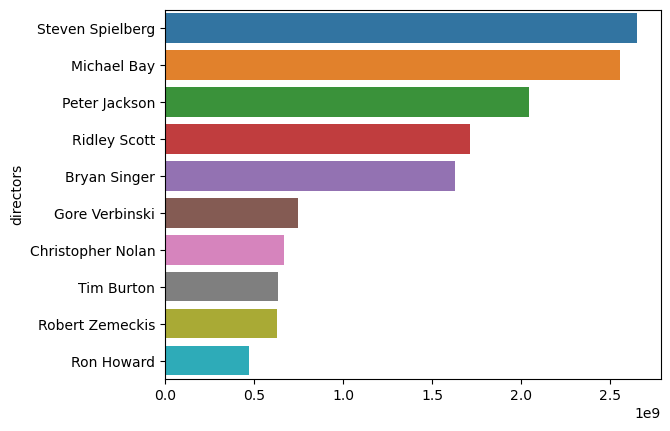

In [57]:

task5=movie_data[(movie_data["vote_average"]>5) & (movie_data["release_year"]>2010) & (movie_data["release_month"].between(5,7))]
task5 = movie_data.groupby(movie_data['directors'])['budget'].sum()
task5=task5.sort_values(ascending=False).head(10)
sns.barplot(y=task5.index,x=task3.values)
plt.show()

### 6. Top 5  drama type movies based on profit which released between october to december

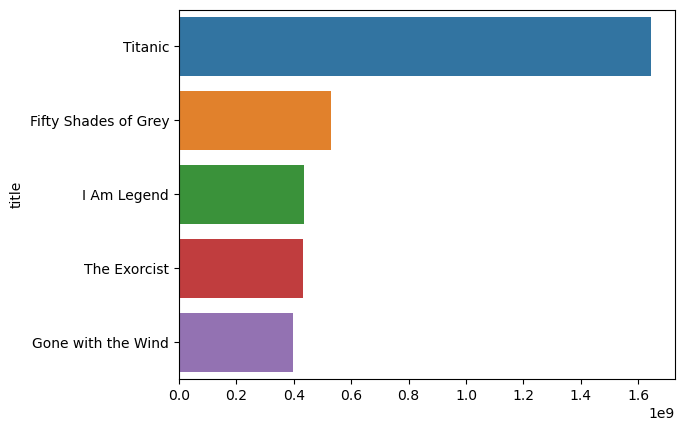

In [58]:
task6=movie_data[(movie_data["genre_type"]=="Drama") & (movie_data["release_month"].between(10,12))]
task6 = task6.groupby(task6['title'])['profit'].sum()
task6=task6.sort_values(ascending=False).head(5)
sns.barplot(y=task6.index,x=task6.values)
plt.show()

### 7. Top 5 action type english movies based on budget which released between april to august

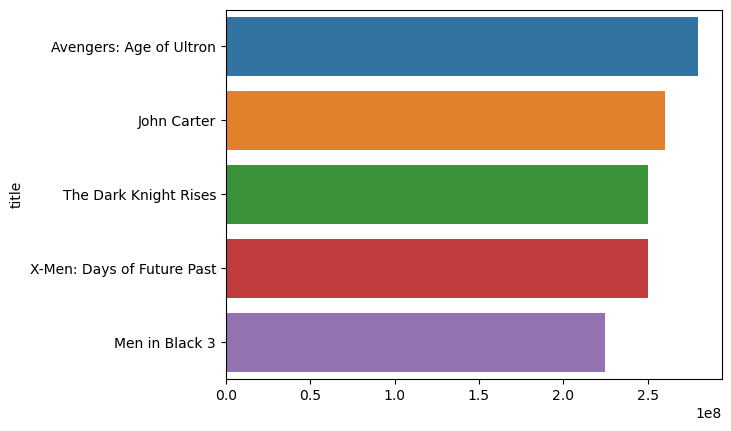

In [59]:
task7=movie_data[(movie_data["genre_type"]=="Action") & (movie_data["release_month"].between(4,8))&(movie_data["original_language"]=="en")]
task7 = task7.groupby(task7['title'])['budget'].sum()
task7=task7.sort_values(ascending=False).head(5)
sns.barplot(y=task7.index,x=task7.values)
plt.show()

### exporting data as csv file

In [60]:
# movie_data.to_csv("movie_data.csv")

##  -----------------------------------------------------Machine Learning-----------------------------------------------------

In [61]:
new_data=movie_data.copy()
new_data.head(2)

budget original_language  popularity       revenue  runtime    status  \
0  237000000.0                en  150.437577  2.787965e+09    162.0  Released   
1  300000000.0                en  139.082615  9.610000e+08    169.0  Released   

   vote_average  vote_count                                     title  \
0           7.2       11800                                    Avatar   
1           6.9        4500  Pirates of the Caribbean: At World's End   

   release_year  release_month genre_type        production_country  \
0        2009.0           10.0     Action  United States of America   
1        2007.0            5.0  Adventure  United States of America   

         lead_name       production_company   lead_chatacter_name  \
0  Sam Worthington  Ingenious Film Partners            Jake Sully   
1      Johnny Depp     Walt Disney Pictures  Captain Jack Sparrow   

        directors        profit  
0   James Cameron  2.550965e+09  
1  Gore Verbinski  6.610000e+08

In [62]:
# creating new column as "rating" that is based on vote_average.
new_data["rating"]=0
mean=new_data["vote_average"].mean()
new_data["rating"][new_data["vote_average"]> mean]="Good"
new_data["rating"][(new_data["vote_average"]>= mean/2) & (new_data["vote_average"]<= mean)]="Average"
new_data["rating"][new_data["vote_average"]< mean/2]="Poor"

## Univariate Analysis

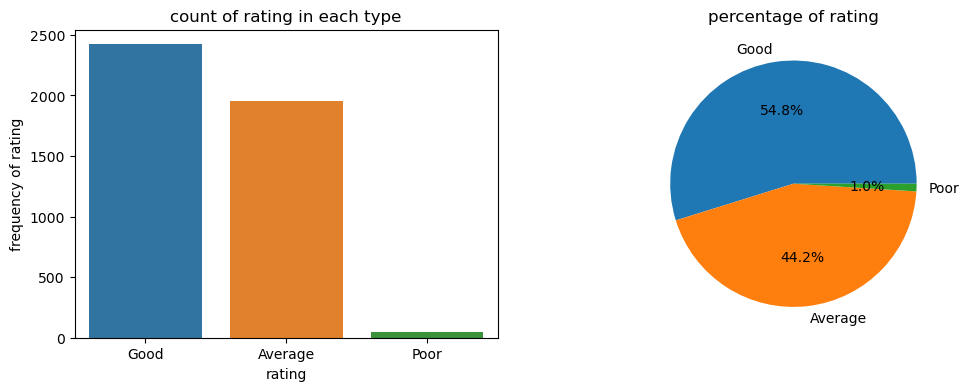

In [63]:
# Visualise the balance of the data
value_counts=new_data["rating"].value_counts()
fig,ax=plt.subplots(1,2,figsize=(12,4))
sns.barplot(x=value_counts.index,y=value_counts.values,ax=ax[0])
ax[0].set_title("count of rating in each type")
ax[0].set_xlabel("rating")
ax[0].set_ylabel("frequency of rating")

per=new_data["rating"].value_counts(normalize=True)*100
ax[1].pie(per.values,labels=per.index,autopct="%1.1f%%")
ax[1].set_title("percentage of rating")
plt.show()

Data needs to be balanced

## Bivariate Analysis on Categorical columns

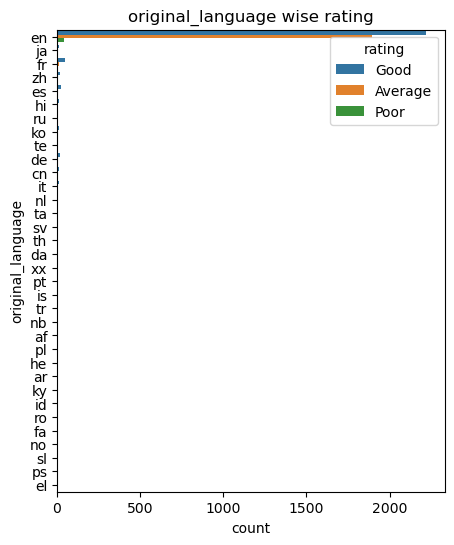

In [64]:
plt.figure(figsize=(5,6))
sns.countplot(y="original_language",hue="rating",data=new_data)
plt.title("original_language wise rating")
plt.show()

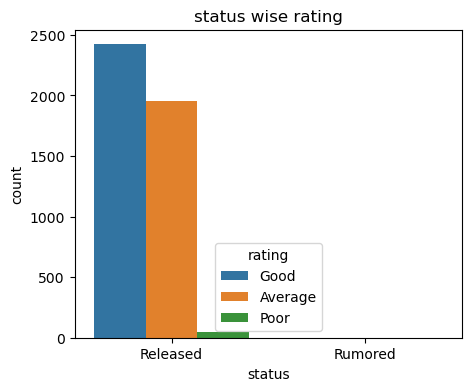

In [65]:
plt.figure(figsize=(5,4))
sns.countplot(x="status",hue="rating",data=new_data)
plt.title("status wise rating")
plt.show()

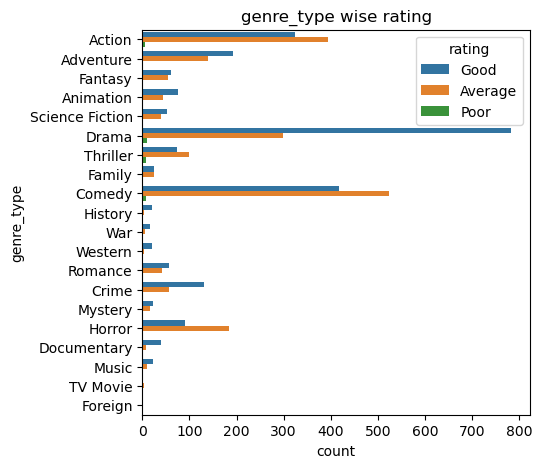

In [66]:
plt.figure(figsize=(5,5))
sns.countplot(y="genre_type",hue="rating",data=new_data)
plt.title("genre_type wise rating")
plt.show()

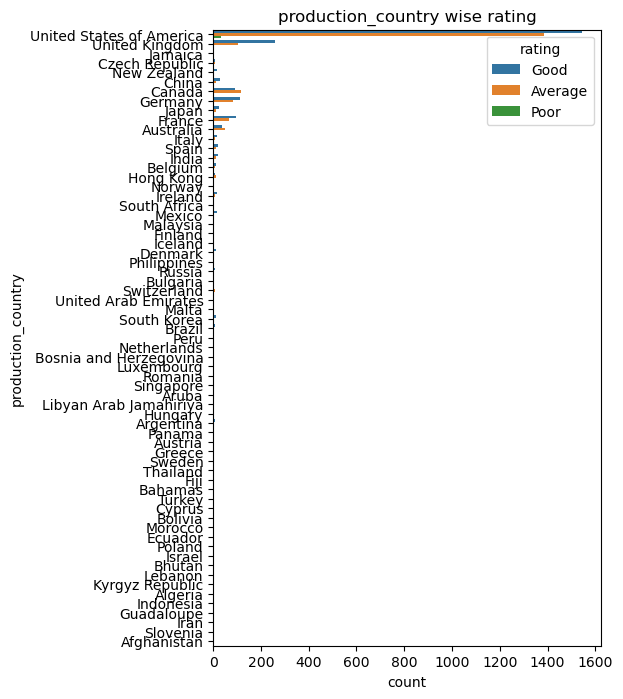

In [67]:
plt.figure(figsize=(5,8))
sns.countplot(y="production_country",hue="rating",data=new_data)
plt.title("production_country wise rating")
plt.show()

## Bivariate Analysis on Numerical columns

In [68]:
def hist_box1(*s):
    for col in s:
        values=new_data[col].values
        fig,ax=plt.subplots(1,2,figsize=(15,4))
        sns.histplot(x=values,hue="rating",bins=20,ax=ax[0],data=new_data)
        ax[0].set_title(f"Distribution of {col} using histogram")
        ax[0].set_xlabel(f"{col}")
        ax[0].set_ylabel(f"frequency of {col}")


        sns.boxplot(y=col,x="rating",ax=ax[1],data=new_data)
        ax[1].set_title(f"Distribution using boxplot of {col}")
        plt.show()

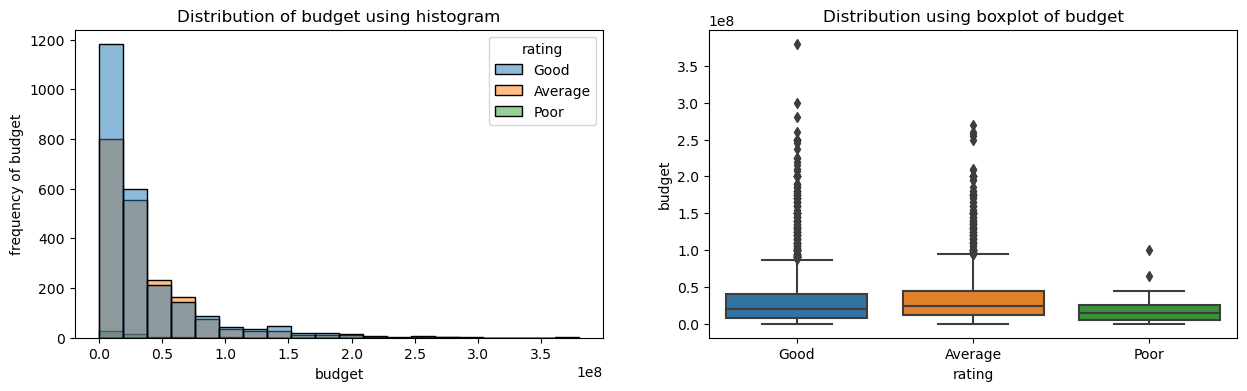

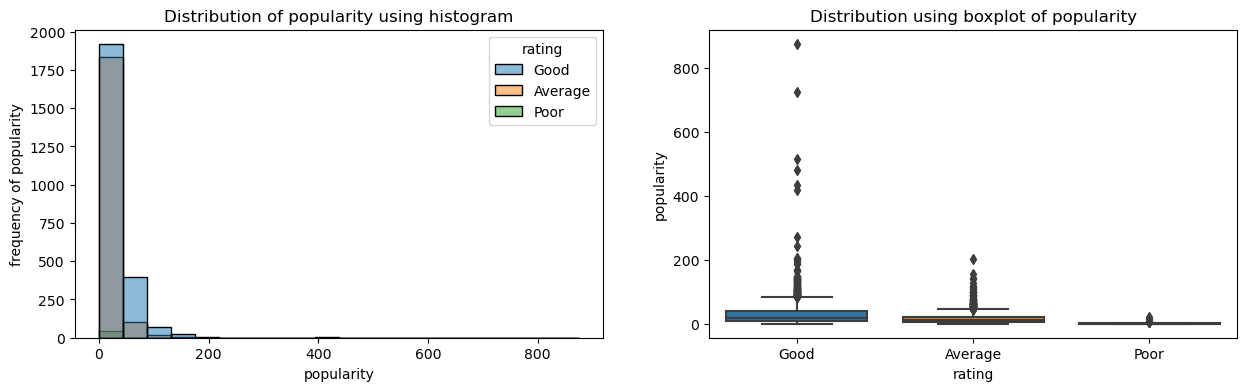

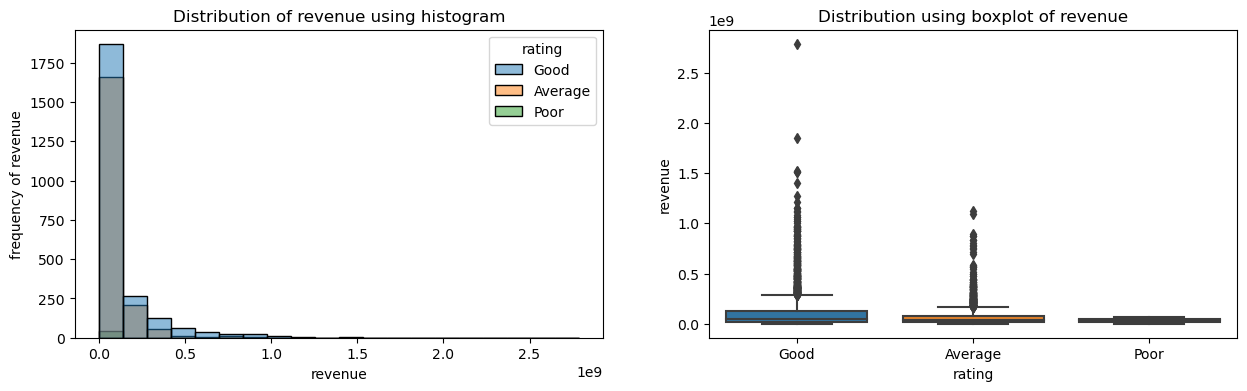

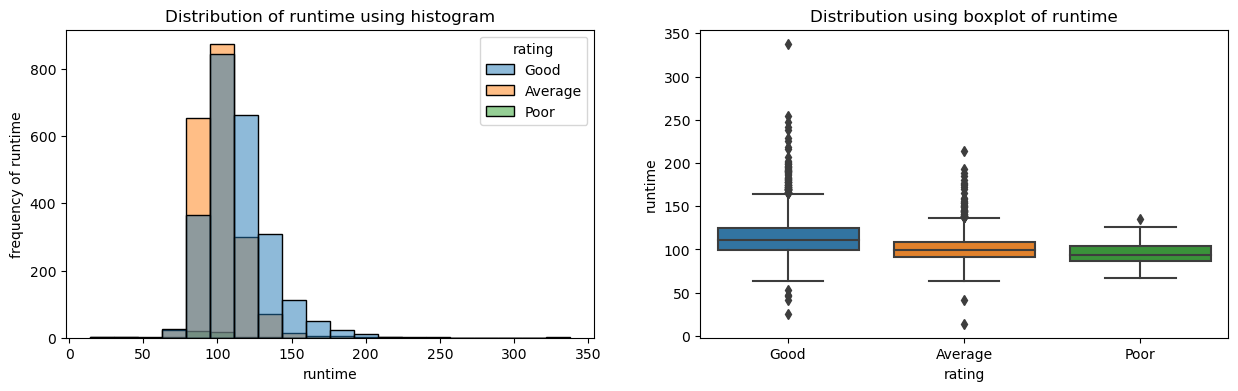

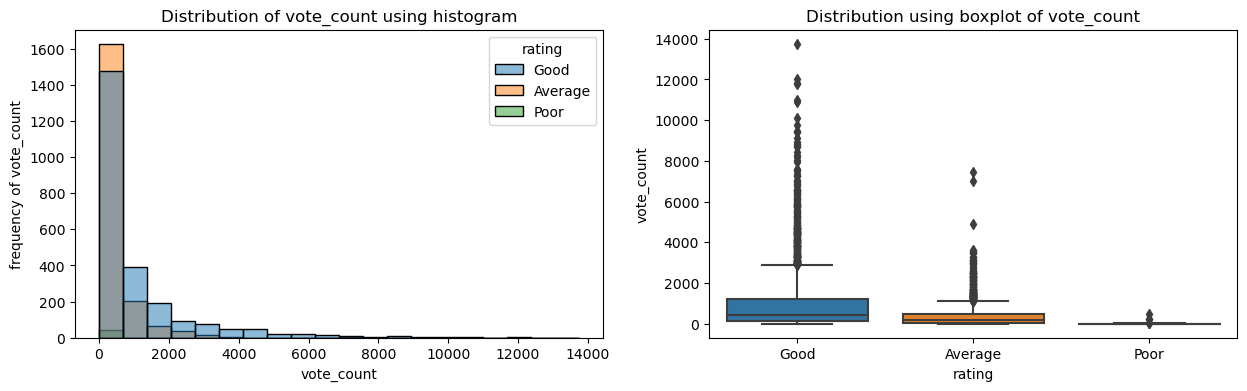

In [69]:
hist_box1("budget","popularity","revenue","runtime","vote_count")

## Feature Extraction

In [70]:
# converting all categorical values to numerical values.
for col in new_data.select_dtypes("object"):
     new_data[col]=LabelEncoder().fit_transform(new_data[col])

### Balancing data by Over sampling(SMOTE)

In [71]:
A=new_data.drop(["rating"],axis=1)
B=new_data["rating"]

In [72]:
# Balancing data by oversampling.
sm=SMOTE(random_state=42)
A_bal,B_bal=sm.fit_resample(A,B)

In [73]:
# creating new Dataframe with balanced data
balanced_data=A_bal.copy()
balanced_data["rating"]=B_bal

## Visualising Balanced Data

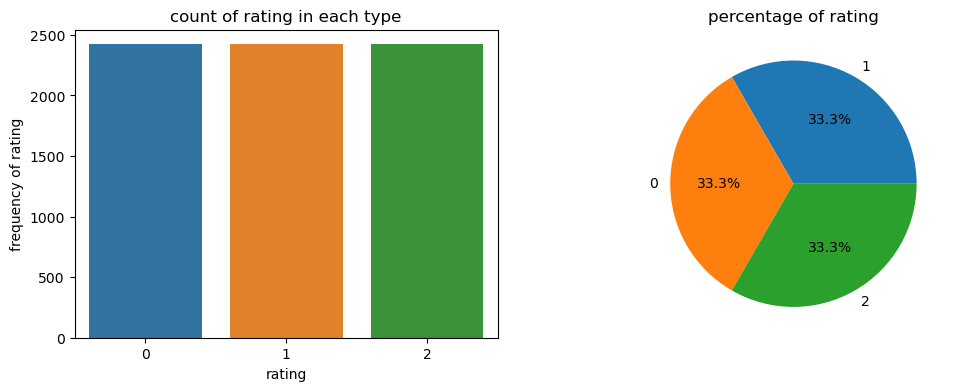

In [74]:
# visualising the balance of the data.
value_counts=balanced_data["rating"].value_counts()
fig,ax=plt.subplots(1,2,figsize=(12,4))
sns.barplot(x=value_counts.index,y=value_counts.values,ax=ax[0])
ax[0].set_title("count of rating in each type")
ax[0].set_xlabel("rating")
ax[0].set_ylabel("frequency of rating")

per=balanced_data["rating"].value_counts(normalize=True)*100
ax[1].pie(per.values,labels=per.index,autopct="%1.1f%%")
ax[1].set_title("percentage of rating")
plt.show()

## Correlations between features

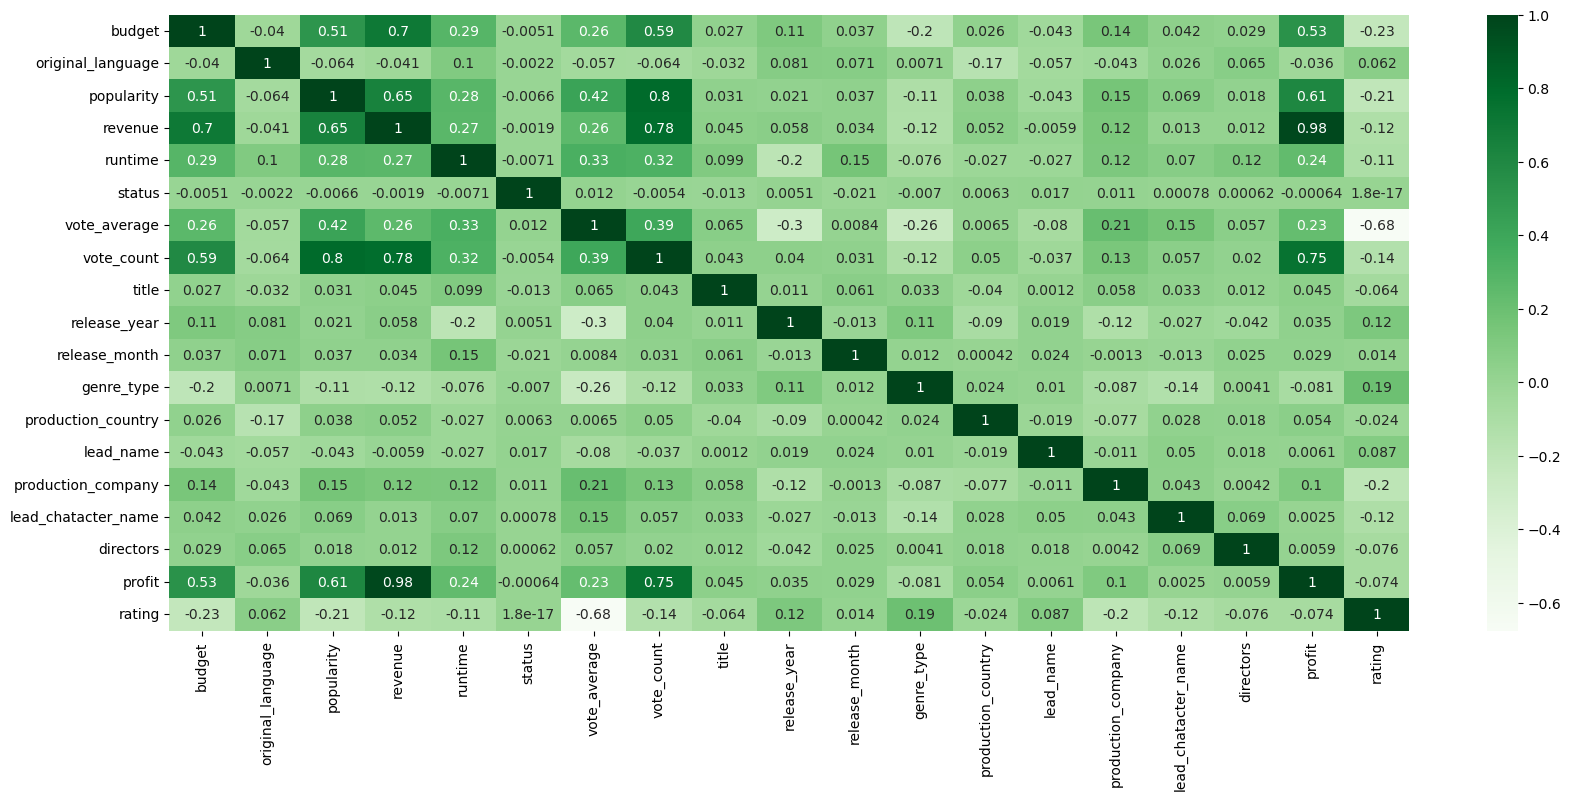

In [75]:
# correlations between the features
correlation_matrix=balanced_data.corr()
plt.figure(figsize=(20,8))
sns.heatmap(correlation_matrix,annot=True,cmap="Greens")
plt.show()

### Feature selection by dropping unnecessary columns

In [76]:
balanced_data.drop(["status","revenue","vote_count","profit","vote_average"],axis=1,inplace=True)

In [77]:
X=balanced_data.drop(["rating"],axis=1)
y=balanced_data["rating"]

### Scaling Balanced data

In [78]:
scaled_x=pd.DataFrame(StandardScaler().fit_transform(X),columns=X.columns)

In [79]:
scaled_data=scaled_x.copy()
scaled_data["rating"]=y
scaled_data

budget  original_language  popularity   runtime     title  \
0     6.091686          -0.189132    4.875481  3.156688 -1.471781   
1     7.928250          -0.189132    4.464732  3.537904  0.248711   
2     6.324901          -0.189132    3.317821  2.394254  0.656021   
3     6.470660          -0.189132    3.496380  3.320066  0.993649   
4     6.762178          -0.189132    1.022620  1.522901 -0.314555   
...        ...                ...         ...       ...       ...   
7261 -0.522854          -0.189132   -0.540540 -0.971324 -1.504963   
7262 -0.632813          -0.189132   -0.382445 -0.589617  0.645237   
7263 -0.084499           5.388113   -0.565128 -0.152200 -1.066130   
7264  0.100737          -0.189132   -0.453107 -0.996641 -0.252339   
7265 -0.192872          -0.189132   -0.551475  0.615479  0.787090   

      release_year  release_month  genre_type  production_country  lead_name  \
0         0.438507       1.055828   -1.204095            0.592168   1.200232   
1         0.258915      -0.520608   -1.001305            0.592168  -0.182403   
2         0.977283       1.055828   -1.204095            0.535886  -1.198804   
3         0.707895       0.109967   -1.204095            0.592168  -1.342829   
4         0.707895       0.109967   -1.204095            0.592168   1.502683   
...            ...            ...         ...                 ...        ...   
7261     -0.526755      -1.403286   -0.595726            0.592168  -0.528062   
7262      0.124938       0.511699   -0.595726           -1.490261   0.002771   
7263      0.887487       0.888022    0.621012            0.141913  -1.528003   
7264      0.821440       0.392689    0.823801           -1.265134  -0.466337   
7265      0.453229       0.740541    0.621012           -0.646033   1.352486   

      production_company  lead_chatacter_name  directors  rating  
0              -0.249320            -0.121142  -0.435312       1  
1               1.524817            -1.242924  -0.618638       1  
2              -1.197565            -0.105762   1.256922       1  
3              -0.026858            -1.308289  -1.260276       1  
4               1.524817             0.080721  -1.679810       0  
...                  ...                  ...        ...     ...  
7261           -0.438413            -0.131716  -1.632215       2  
7262           -1.002911            -1.037216  -1.136884       2  
7263           -0.385578             0.008627   0.532434       2  
7264            0.718391             0.037464  -0.556942       2  
7265            0.178920            -0.690204  -1.105155       2  

[7266 rows x 14 columns]

## Data Splitting

In [80]:
x_train,x_test,y_train,y_test=train_test_split(scaled_x,y,test_size=0.2,random_state=42)

In [81]:
kf=KFold(n_splits=5,shuffle=True, random_state=42)

## Collection of Performance metrics

In [82]:
accuracy_train=[]
accuracy_test=[]
precision=[]
recall=[]
f1_scores=[]
def metrics(model):
    accuracy_train.append(ACCURACY_TRAIN)
    accuracy_test.append(ACCURACY_TEST)
    precision.append(PRECISION)
    recall.append(RECALL)
    f1_scores.append(F1_SCORE)

In [83]:
def metrics_print(model):
    print("Model accuracy score on training data :",model.score(x_train,y_train))
    average_accuracy_score_train.append(model.score(x_train,y_train))

    print("Model accuracy score on test data :",model.score(x_test,y_test))
    average_accuracy_score_test.append(model.score(x_test,y_test))

    print()
    PREC=precision_score(y_test,y_pred,average="macro")
    print("Model precision_score :",PREC)
    avg_prec.append(PREC)

    RCL=recall_score(y_test,y_pred,average="macro")
    print("Model recall_score :",RCL)
    avg_recall.append(RCL)

    F1=f1_score(y_test,y_pred,average="macro")
    print("Model f1_score:",F1)
    avg_f1.append(F1)

    print("Model confusion matrix on test data :")
    plt.figure(figsize=(5,2))
    sns.heatmap(confusion_matrix(y_test,y_pred),annot=True,fmt="g")
    plt.show()
    print()
    print("Model classification matrix on test data :\n",classification_report(y_test,y_pred))
    print("--"*50)
    print("--"*50)

In [84]:
def metrics_print1(model):
    
    ACCURACY_TRAIN=model.score(x_train,y_train)
    print("Model accuracy score on training data :",ACCURACY_TRAIN)
    
    ACCURACY_TEST=model.score(x_test,y_test)
    print("Model accuracy score on test data :",ACCURACY_TEST)
    print()

    PRECISION=precision_score(y_test,y_pred,average="macro")
    print("Model precision_score :",PRECISION)

    RECALL=recall_score(y_test,y_pred,average="macro")
    print("Model recall_score :",RECALL)

    F1_SCORE=f1_score(y_test,y_pred,average="macro")
    print("Model f1_score:",F1_SCORE)
    print()

    print("Model confusion matrix on test data :")
    plt.figure(figsize=(5,2))
    sns.heatmap(confusion_matrix(y_test,y_pred),annot=True,fmt="g")
    plt.show()

    print()

    print("Model classification matrix on test data :\n",classification_report(y_test,y_pred))
    accuracy_train.append(ACCURACY_TRAIN)
    accuracy_test.append(ACCURACY_TEST)
    precision.append(PRECISION)
    recall.append(RECALL)
    f1_scores.append(F1_SCORE)

##  -------------------------------------------------------Model Ctreation-------------------------------------------------------

## Logistic Regression

Model accuracy score on training data : 0.7167928423950447
Model accuracy score on test data : 0.7070151306740028

Model precision_score : 0.7082090274917658
Model recall_score : 0.7107531214015865
Model f1_score: 0.7042348631112407
Model confusion matrix on test data :


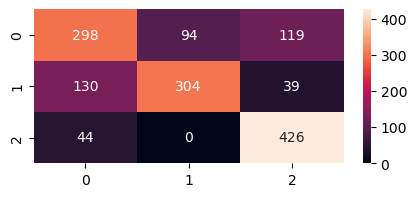


Model classification matrix on test data :
               precision    recall  f1-score   support

           0       0.63      0.58      0.61       511
           1       0.76      0.64      0.70       473
           2       0.73      0.91      0.81       470

    accuracy                           0.71      1454
   macro avg       0.71      0.71      0.70      1454
weighted avg       0.71      0.71      0.70      1454

----------------------------------------------------------------------------------------------------
----------------------------------------------------------------------------------------------------
Model accuracy score on training data : 0.7135730259762602
Model accuracy score on test data : 0.7247075017205781

Model precision_score : 0.7175783723451067
Model recall_score : 0.7188288359687031
Model f1_score: 0.7141436946433039
Model confusion matrix on test data :


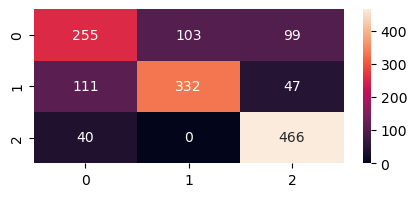


Model classification matrix on test data :
               precision    recall  f1-score   support

           0       0.63      0.56      0.59       457
           1       0.76      0.68      0.72       490
           2       0.76      0.92      0.83       506

    accuracy                           0.72      1453
   macro avg       0.72      0.72      0.71      1453
weighted avg       0.72      0.72      0.72      1453

----------------------------------------------------------------------------------------------------
----------------------------------------------------------------------------------------------------
Model accuracy score on training data : 0.7189059005676931
Model accuracy score on test data : 0.7164487267721955

Model precision_score : 0.713398109871464
Model recall_score : 0.7167263734286481
Model f1_score: 0.711365505754387
Model confusion matrix on test data :


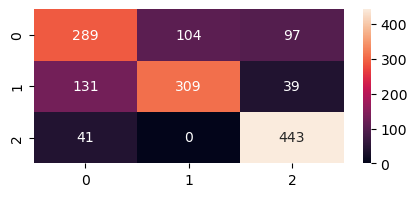


Model classification matrix on test data :
               precision    recall  f1-score   support

           0       0.63      0.59      0.61       490
           1       0.75      0.65      0.69       479
           2       0.77      0.92      0.83       484

    accuracy                           0.72      1453
   macro avg       0.71      0.72      0.71      1453
weighted avg       0.71      0.72      0.71      1453

----------------------------------------------------------------------------------------------------
----------------------------------------------------------------------------------------------------
Model accuracy score on training data : 0.7180457595045587
Model accuracy score on test data : 0.7157604955264969

Model precision_score : 0.7114510233175896
Model recall_score : 0.7194969191188879
Model f1_score: 0.7121850293652586
Model confusion matrix on test data :


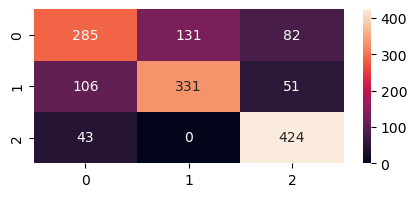


Model classification matrix on test data :
               precision    recall  f1-score   support

           0       0.66      0.57      0.61       498
           1       0.72      0.68      0.70       488
           2       0.76      0.91      0.83       467

    accuracy                           0.72      1453
   macro avg       0.71      0.72      0.71      1453
weighted avg       0.71      0.72      0.71      1453

----------------------------------------------------------------------------------------------------
----------------------------------------------------------------------------------------------------
Model accuracy score on training data : 0.7182177877171856
Model accuracy score on test data : 0.7178251892635926

Model precision_score : 0.7158301847312872
Model recall_score : 0.7158879876612527
Model f1_score: 0.7127172906329179
Model confusion matrix on test data :


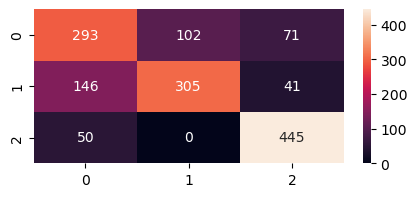


Model classification matrix on test data :
               precision    recall  f1-score   support

           0       0.60      0.63      0.61       466
           1       0.75      0.62      0.68       492
           2       0.80      0.90      0.85       495

    accuracy                           0.72      1453
   macro avg       0.72      0.72      0.71      1453
weighted avg       0.72      0.72      0.71      1453

----------------------------------------------------------------------------------------------------
----------------------------------------------------------------------------------------------------
Average Accuracy score of test on different K-Fold 0.7163514087913733


In [85]:
average_accuracy_score_train=[]
average_accuracy_score_test=[]
avg_prec=[]
avg_recall=[]
avg_f1=[]
for train_data,test_data in kf.split(scaled_data):
    train,test=scaled_data.iloc[train_data],scaled_data.iloc[test_data]
    x_train=train.drop("rating",axis=1)
    y_train=train["rating"]
    
    x_test=test.drop("rating",axis=1)
    y_test=test["rating"]
    
    log_model=LogisticRegression().fit(x_train,y_train)
    y_pred=log_model.predict(x_test)
    
    metrics_print(log_model)

lg_ac_train=average_accuracy_score_train.copy()
lg_ac_test=average_accuracy_score_test.copy()
ACCURACY_TRAIN=np.mean(average_accuracy_score_train)
ACCURACY_TEST=np.mean(average_accuracy_score_test)   
print("Average Accuracy score of test on different K-Fold",ACCURACY_TEST)

PRECISION=np.mean(avg_prec) 

RECALL=np.mean(avg_recall) 
F1_SCORE=np.mean(avg_f1) 
metrics(log_model)
    

### Naive Baye's Method

Model accuracy score on training data : 0.6402271163110805
Model accuracy score on test data : 0.5997248968363136

Model precision_score : 0.6223959448847005
Model recall_score : 0.6013615238419181
Model f1_score: 0.5835429078960873
Model confusion matrix on test data :


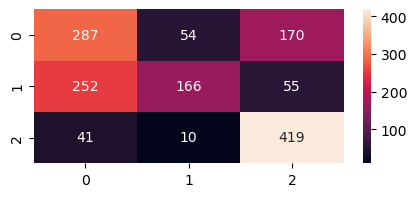


Model classification matrix on test data :
               precision    recall  f1-score   support

           0       0.49      0.56      0.53       511
           1       0.72      0.35      0.47       473
           2       0.65      0.89      0.75       470

    accuracy                           0.60      1454
   macro avg       0.62      0.60      0.58      1454
weighted avg       0.62      0.60      0.58      1454

----------------------------------------------------------------------------------------------------
----------------------------------------------------------------------------------------------------
Model accuracy score on training data : 0.6287631171512128
Model accuracy score on test data : 0.6421197522367516

Model precision_score : 0.6610406103744476
Model recall_score : 0.6387006762123986
Model f1_score: 0.6236828780437248
Model confusion matrix on test data :


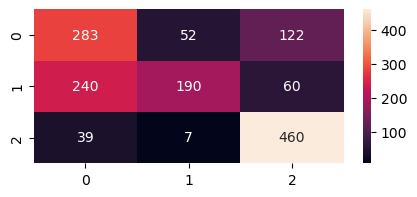


Model classification matrix on test data :
               precision    recall  f1-score   support

           0       0.50      0.62      0.56       457
           1       0.76      0.39      0.51       490
           2       0.72      0.91      0.80       506

    accuracy                           0.64      1453
   macro avg       0.66      0.64      0.62      1453
weighted avg       0.67      0.64      0.63      1453

----------------------------------------------------------------------------------------------------
----------------------------------------------------------------------------------------------------
Model accuracy score on training data : 0.6249784964734216
Model accuracy score on test data : 0.6400550584996559

Model precision_score : 0.6571999177475939
Model recall_score : 0.6393234051328567
Model f1_score: 0.6236791542176094
Model confusion matrix on test data :


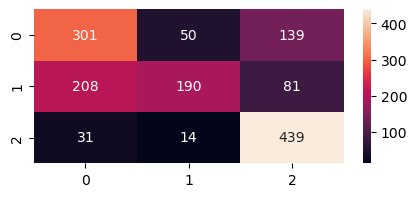


Model classification matrix on test data :
               precision    recall  f1-score   support

           0       0.56      0.61      0.58       490
           1       0.75      0.40      0.52       479
           2       0.67      0.91      0.77       484

    accuracy                           0.64      1453
   macro avg       0.66      0.64      0.62      1453
weighted avg       0.66      0.64      0.62      1453

----------------------------------------------------------------------------------------------------
----------------------------------------------------------------------------------------------------
Model accuracy score on training data : 0.633751935317392
Model accuracy score on test data : 0.6304198210598762

Model precision_score : 0.638450801995094
Model recall_score : 0.6343910118187732
Model f1_score: 0.6211525127758887
Model confusion matrix on test data :


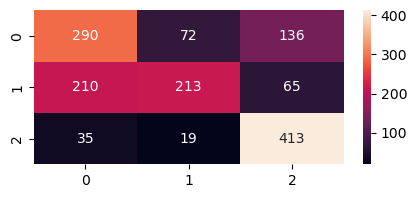


Model classification matrix on test data :
               precision    recall  f1-score   support

           0       0.54      0.58      0.56       498
           1       0.70      0.44      0.54       488
           2       0.67      0.88      0.76       467

    accuracy                           0.63      1453
   macro avg       0.64      0.63      0.62      1453
weighted avg       0.64      0.63      0.62      1453

----------------------------------------------------------------------------------------------------
----------------------------------------------------------------------------------------------------
Model accuracy score on training data : 0.6277309478754516
Model accuracy score on test data : 0.6359256710254646

Model precision_score : 0.6558385387229916
Model recall_score : 0.6359943691776624
Model f1_score: 0.619431957977401
Model confusion matrix on test data :


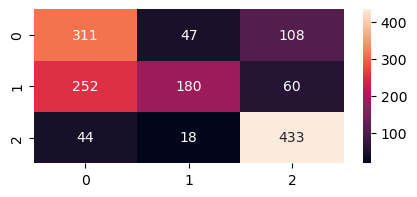


Model classification matrix on test data :
               precision    recall  f1-score   support

           0       0.51      0.67      0.58       466
           1       0.73      0.37      0.49       492
           2       0.72      0.87      0.79       495

    accuracy                           0.64      1453
   macro avg       0.66      0.64      0.62      1453
weighted avg       0.66      0.64      0.62      1453

----------------------------------------------------------------------------------------------------
----------------------------------------------------------------------------------------------------
Average Accuracy score of test on different K-Fold 0.6296490399316124


In [86]:
average_accuracy_score_train=[]
average_accuracy_score_test=[]
avg_prec=[]
avg_recall=[]
avg_f1=[]

for train_data,test_data in kf.split(scaled_data):
    train,test=scaled_data.iloc[train_data],scaled_data.iloc[test_data]
    x_train=train.drop("rating",axis=1)
    y_train=train["rating"]
    
    x_test=test.drop("rating",axis=1)
    y_test=test["rating"]
    
    gss_model=GaussianNB().fit(x_train,y_train)
    y_pred=gss_model.predict(x_test)
    
    metrics_print(gss_model)
    
nv_ac_train=average_accuracy_score_train.copy()
nv_ac_test=average_accuracy_score_test.copy()
    
ACCURACY_TRAIN=np.mean(average_accuracy_score_train)
ACCURACY_TEST=np.mean(average_accuracy_score_test)
print("Average Accuracy score of test on different K-Fold",ACCURACY_TEST)

PRECISION=np.mean(avg_prec)  
RECALL=np.mean(avg_recall) 
F1_SCORE=np.mean(avg_f1) 
metrics(gss_model)

## Decision tree classifier

In [87]:
param_grid={'min_samples_split':np.arange(10,51,10),
           'min_samples_leaf':np.arange(10,101,20),
           'max_depth':np.arange(3,10)}

In [87]:
dt=DecisionTreeClassifier()

In [88]:
grid_cv=GridSearchCV(dt,param_grid,scoring="accuracy",cv=kf)

In [406]:
grid_cv.fit(x_train,y_train)

GridSearchCV(cv=KFold(n_splits=5, random_state=42, shuffle=True),
             estimator=DecisionTreeClassifier(),
             param_grid={'max_depth': array([3, 4, 5, 6, 7, 8, 9]),
                         'min_samples_leaf': array([10, 30, 50, 70, 90]),
                         'min_samples_split': array([10, 20, 30, 40, 50])},
             scoring='accuracy')

In [407]:
grid_cv.best_estimator_

DecisionTreeClassifier(max_depth=9, min_samples_leaf=30, min_samples_split=10)

In [88]:
dt_model=DecisionTreeClassifier(max_depth=9, min_samples_leaf=30, min_samples_split=10).fit(x_train,y_train)
y_pred=dt_model.predict(x_test)

Model accuracy score on training data : 0.7849647342164114
Model accuracy score on test data : 0.7432897453544391

Model precision_score : 0.7417514789191547
Model recall_score : 0.7419361450084784
Model f1_score: 0.7389263644088331

Model confusion matrix on test data :


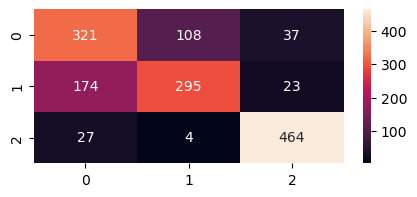


Model classification matrix on test data :
               precision    recall  f1-score   support

           0       0.61      0.69      0.65       466
           1       0.72      0.60      0.66       492
           2       0.89      0.94      0.91       495

    accuracy                           0.74      1453
   macro avg       0.74      0.74      0.74      1453
weighted avg       0.74      0.74      0.74      1453



In [89]:
metrics_print1(dt_model)

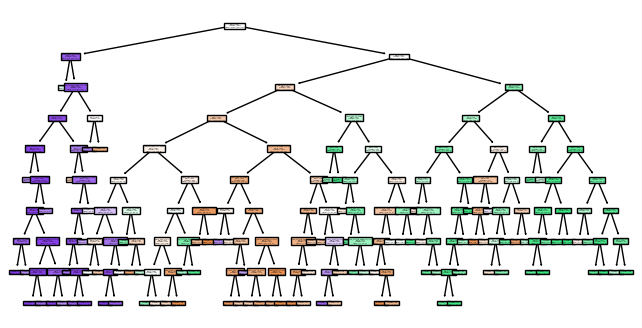

In [410]:
plt.figure(figsize=(8,4))
tree.plot_tree(dt_model,feature_names=scaled_x.columns,filled=True)
plt.show()

## Random forest classifier

In [411]:
param_grid={'n_estimators':np.arange(20,101,20),
           'min_samples_split':np.arange(10,51,10),
           'min_samples_leaf':np.arange(3,10),
           'max_depth':np.arange(3,10)}

In [412]:
rf=RandomForestClassifier()

In [413]:
grid_cv=GridSearchCV(rf,param_grid,scoring="accuracy",cv=kf)

In [414]:
grid_cv.fit(x_train,y_train)

GridSearchCV(cv=KFold(n_splits=5, random_state=42, shuffle=True),
             estimator=RandomForestClassifier(),
             param_grid={'max_depth': array([3, 4, 5, 6, 7, 8, 9]),
                         'min_samples_leaf': array([3, 4, 5, 6, 7, 8, 9]),
                         'min_samples_split': array([10, 20, 30, 40, 50]),
                         'n_estimators': array([ 20,  40,  60,  80, 100])},
             scoring='accuracy')

In [415]:
grid_cv.best_estimator_

RandomForestClassifier(max_depth=9, min_samples_leaf=4, min_samples_split=10,
                       n_estimators=80)

In [90]:
rf_model=RandomForestClassifier(max_depth=9, min_samples_leaf=4, min_samples_split=10,
                       n_estimators=80,random_state=42).fit(x_train,y_train)
y_pred=rf_model.predict(x_test)

Model accuracy score on training data : 0.8828487872011009
Model accuracy score on test data : 0.8059187887130076

Model precision_score : 0.8042268689910225
Model recall_score : 0.8047923669508511
Model f1_score: 0.8028495775062346

Model confusion matrix on test data :


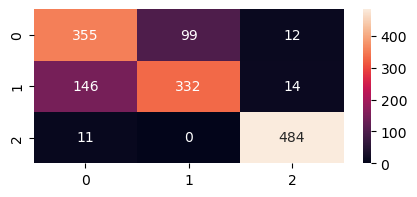


Model classification matrix on test data :
               precision    recall  f1-score   support

           0       0.69      0.76      0.73       466
           1       0.77      0.67      0.72       492
           2       0.95      0.98      0.96       495

    accuracy                           0.81      1453
   macro avg       0.80      0.80      0.80      1453
weighted avg       0.81      0.81      0.80      1453



In [91]:
metrics_print1(rf_model)

## Adaboost classifier

In [418]:
param_grid={"n_estimators": np.arange(10,101,10),
           "learning_rate":np.arange(0.05,1,0.05)}

In [419]:
ada=AdaBoostClassifier()

In [420]:
grid_cv=GridSearchCV(ada,param_grid,scoring="accuracy",cv=kf)

In [421]:
grid_cv.fit(x_train,y_train)

GridSearchCV(cv=KFold(n_splits=5, random_state=42, shuffle=True),
             estimator=AdaBoostClassifier(),
             param_grid={'learning_rate': array([0.05, 0.1 , 0.15, 0.2 , 0.25, 0.3 , 0.35, 0.4 , 0.45, 0.5 , 0.55,
       0.6 , 0.65, 0.7 , 0.75, 0.8 , 0.85, 0.9 , 0.95]),
                         'n_estimators': array([ 10,  20,  30,  40,  50,  60,  70,  80,  90, 100])},
             scoring='accuracy')

In [423]:
grid_cv.best_estimator_

AdaBoostClassifier(learning_rate=0.9500000000000001)

In [92]:
ada_model=AdaBoostClassifier(learning_rate=0.9500000000000001).fit(x_train,y_train)
y_pred=ada_model.predict(x_test)

Model accuracy score on training data : 0.733700326853604
Model accuracy score on test data : 0.7240192704748796

Model precision_score : 0.7358395801570362
Model recall_score : 0.723556758132284
Model f1_score: 0.7229452013497905

Model confusion matrix on test data :


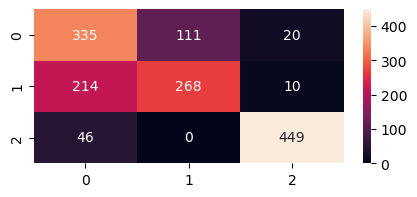


Model classification matrix on test data :
               precision    recall  f1-score   support

           0       0.56      0.72      0.63       466
           1       0.71      0.54      0.62       492
           2       0.94      0.91      0.92       495

    accuracy                           0.72      1453
   macro avg       0.74      0.72      0.72      1453
weighted avg       0.74      0.72      0.72      1453



In [93]:
metrics_print1(ada_model)

## K-Nearest Neighbors

In [428]:
accuracy_scores=[]
for k in range(70,100):
    knn_score=cross_val_score(KNeighborsClassifier(k),x_train,y_train,scoring="accuracy",cv=kf)
    accuracy_scores.append(np.mean(knn_score))

In [429]:
for k in range(70,100):
    print("number of neighbors:",k,":",round(accuracy_scores[k-70],4))

number of neighbors: 70 : 0.619
number of neighbors: 71 : 0.6195
number of neighbors: 72 : 0.6174
number of neighbors: 73 : 0.6188
number of neighbors: 74 : 0.616
number of neighbors: 75 : 0.6172
number of neighbors: 76 : 0.6169
number of neighbors: 77 : 0.6153
number of neighbors: 78 : 0.615
number of neighbors: 79 : 0.6133
number of neighbors: 80 : 0.6136
number of neighbors: 81 : 0.614
number of neighbors: 82 : 0.6121
number of neighbors: 83 : 0.6128
number of neighbors: 84 : 0.6112
number of neighbors: 85 : 0.6105
number of neighbors: 86 : 0.6092
number of neighbors: 87 : 0.6078
number of neighbors: 88 : 0.6061
number of neighbors: 89 : 0.6057
number of neighbors: 90 : 0.6052
number of neighbors: 91 : 0.6057
number of neighbors: 92 : 0.6045
number of neighbors: 93 : 0.6054
number of neighbors: 94 : 0.604
number of neighbors: 95 : 0.604
number of neighbors: 96 : 0.6043
number of neighbors: 97 : 0.6042
number of neighbors: 98 : 0.6036
number of neighbors: 99 : 0.605


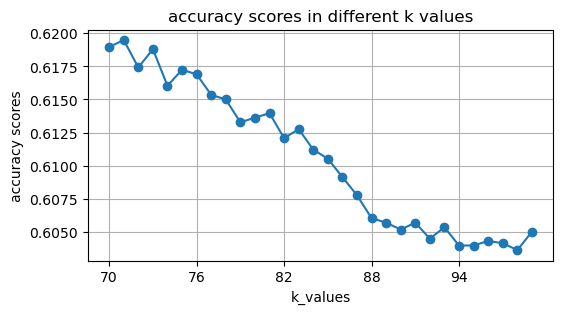

In [430]:
plt.figure(figsize=(6,3))
plt.plot(range(70,100),accuracy_scores,marker="o")
plt.ylabel("accuracy scores")
plt.xlabel("k_values")
plt.title("accuracy scores in different k values")
plt.xticks(range(70,100,6))
plt.grid()
plt.show()

In [94]:
k=71
knn_model=KNeighborsClassifier(k).fit(x_train,y_train)
y_pred=knn_model.predict(x_test)

Model accuracy score on training data : 0.6440736280750043
Model accuracy score on test data : 0.6386785960082588

Model precision_score : 0.6698873814090845
Model recall_score : 0.6361102740302992
Model f1_score: 0.6118319797246702

Model confusion matrix on test data :


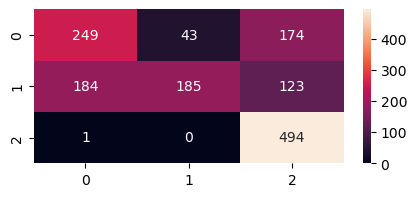


Model classification matrix on test data :
               precision    recall  f1-score   support

           0       0.57      0.53      0.55       466
           1       0.81      0.38      0.51       492
           2       0.62      1.00      0.77       495

    accuracy                           0.64      1453
   macro avg       0.67      0.64      0.61      1453
weighted avg       0.67      0.64      0.61      1453



In [95]:
metrics_print1(knn_model)

## Stacked Classifier

In [96]:
level1=[]
level1.append(("lr",LogisticRegression()))
level1.append(("gss",GaussianNB()))
level1.append(("dt",DecisionTreeClassifier(max_depth=9, min_samples_leaf=30, min_samples_split=10)))
level1.append(("rf",RandomForestClassifier(max_depth=9, min_samples_leaf=4, min_samples_split=10,
                       n_estimators=80,random_state=42)))
level1.append(("ada",AdaBoostClassifier(learning_rate=0.9500000000000001)))
level1.append(("knn",KNeighborsClassifier(71)))
level1.append(("svm",SVC()))

level2=LogisticRegression()

In [97]:
stack_model=StackingClassifier(estimators=level1,final_estimator=level2,cv=kf).fit(x_train,y_train)
y_pred=stack_model.predict(x_test)

Model accuracy score on training data : 0.8809564768622054
Model accuracy score on test data : 0.817618719889883

Model precision_score : 0.815242981071909
Model recall_score : 0.8162311203031395
Model f1_score: 0.8147838845912116

Model confusion matrix on test data :


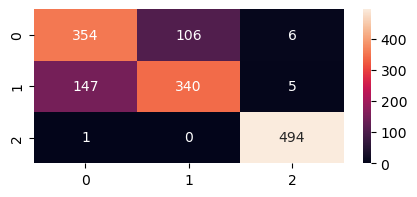


Model classification matrix on test data :
               precision    recall  f1-score   support

           0       0.71      0.76      0.73       466
           1       0.76      0.69      0.72       492
           2       0.98      1.00      0.99       495

    accuracy                           0.82      1453
   macro avg       0.82      0.82      0.81      1453
weighted avg       0.82      0.82      0.82      1453



In [98]:
metrics_print1(stack_model)

## Best Model Selection

In [100]:
model_list=["Logistic Regression","Gaussian Model","Decision Tree classifier","Random Forest classifier","Ada-boost classifier","KNN classifier","Stacked classifier"]
metric_list=["Models","Accuracy(train)","Accuracy(test)","Precision","Recall","F1 score"]

In [101]:
final_results=pd.DataFrame()
for i in range(0,len(model_list)):
    x=[[model_list[i],accuracy_train[i],accuracy_test[i],precision[i],recall[i],f1_scores[i]]]
    new=pd.DataFrame(x)
    final_results=pd.concat([final_results,new],axis=0)
final_results.columns=metric_list
final_results=final_results.reset_index(drop=True)  
final_results

Models  Accuracy(train)  Accuracy(test)  Precision  \
0       Logistic Regression         0.717107        0.716351   0.713293   
1            Gaussian Model         0.631090        0.629649   0.646985   
2  Decision Tree classifier         0.784965        0.743290   0.741751   
3  Random Forest classifier         0.882849        0.805919   0.804227   
4      Ada-boost classifier         0.733700        0.724019   0.735840   
5            KNN classifier         0.644074        0.638679   0.669887   
6        Stacked classifier         0.880956        0.817619   0.815243   

     Recall  F1 score  
0  0.716339  0.710929  
1  0.629954  0.614298  
2  0.741936  0.738926  
3  0.804792  0.802850  
4  0.723557  0.722945  
5  0.636110  0.611832  
6  0.816231  0.814784

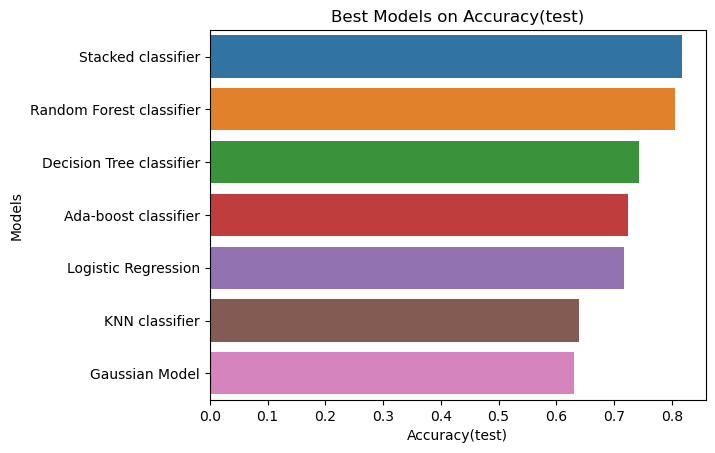

In [102]:
results=final_results.sort_values("Accuracy(test)",ascending=False)
sns.barplot(x="Accuracy(test)",y="Models",data=results)
plt.title("Best Models on Accuracy(test)")
plt.show()

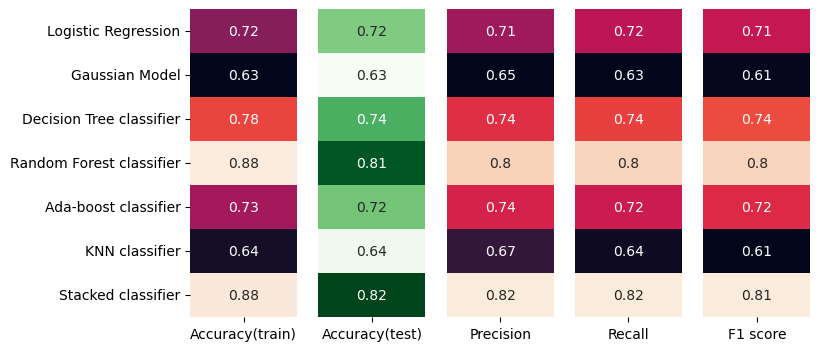

In [103]:
fig,ax=plt.subplots(1,5,figsize=(8,4))

sns.heatmap(final_results[["Accuracy(train)"]],annot=True,yticklabels=model_list,ax=ax[0],cbar=False)
sns.heatmap(final_results[["Accuracy(test)"]],annot=True,ax=ax[1],yticklabels=False,cbar=False,cmap="Greens")
sns.heatmap(final_results[["Precision"]],annot=True,ax=ax[2],yticklabels=False,cbar=False)
sns.heatmap(final_results[["Recall"]],annot=True,ax=ax[3],yticklabels=False,cbar=False)
sns.heatmap(final_results[["F1 score"]],annot=True,ax=ax[4],yticklabels=False,cbar=False)
plt.show()

In [104]:
log_score=lg_ac_test
gss_score=nv_ac_test
dt_score=cross_val_score(dt_model,x_train,y_train,scoring="accuracy",cv=kf)
rf_score=cross_val_score(rf_model,x_train,y_train,scoring="accuracy",cv=kf)
ada_score=cross_val_score(ada_model,x_train,y_train,scoring="accuracy",cv=kf)
knn_score=cross_val_score(knn_model,x_train,y_train,scoring="accuracy",cv=kf)
stack_score=cross_val_score(stack_model,x_train,y_train,scoring="accuracy",cv=kf)

all_scores=[log_score,gss_score,dt_score,rf_score,ada_score,knn_score,stack_score]

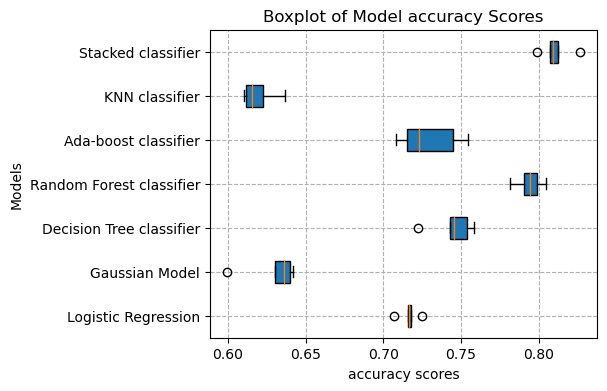

In [105]:
plt.figure(figsize=(5,4))
plt.boxplot(all_scores,labels=model_list,vert=False,patch_artist=True)
plt.title("Boxplot of Model accuracy Scores")
plt.xlabel("accuracy scores")
plt.ylabel("Models")
plt.grid(axis='y', linestyle='--')
plt.grid(axis='x', linestyle='--')
plt.show()

### Stacked classifier is best ML classifier  process to predict Rating